In [14]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import scipy as sp

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import scipy.cluster.hierarchy as shc

from kmodes.kmodes import KModes

In [15]:
data_path = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Clinical projects/PeskindTBI/final_data/first_final.csv'

In [16]:
#read in csv containing data from all surveys
data = pd.read_csv(data_path, index_col=0)
data = pd.DataFrame(data = data)

print('Original data shape:\n', data.shape, '\n')
print(data.info())
data.head(1)

Original data shape:
 (142, 270) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 143
Columns: 270 entries, Group to QEDist_min
dtypes: float64(262), int64(1), object(7)
memory usage: 300.6+ KB
None


Group TBIID         DOB GType   Race  Hispanic  Handedness  ScreenAge  Education  Marital  servconn  cestotal  ExpPB  ExpMark1  ExpAntiM  ExpStim  ExpOthrS  ExpDEET  ExpTick  ExpPCollr  ExpPStrp  ExpPEnvi  ExpToxic  ExpPaint  ExpXsVib  ExpHStrk  ExpRadar  ExpIonRa  ExpYCake  ExpVhicl  ExpUrRnd  ExpDtOrd  ExpGasM  ExpMOPP  ExpRadBg  ExpAN  ExpNG  ExpTNT  ExpPETN  ExpRDX  ExpNC  ExpANFO  ExpCompB  ExpOctol  ExpPntlt  ExpDynmt  ExpOthrX  Inhibit_Mean  Shift_Mean  Emotional Control_Mean  Self Monitor_Mean  Initiate_Mean  Working Memory_Mean  Plan/Organize_Mean  BISAtt  BISMtr  BISNonpl  BISTot  CSFPROTEIN_x  CSFGLUCOSE  CSFRBCS  MHxPain  MHxHA  MHxHtn  MHxCard  MHxGI  MHxNeuro  MHxLung  MHxApnea  SCPTSD  SCMDD  SCPD  SCGAD  SCNone  HYPERTEN  HYPERCHO  DIABETES  B12DEF  THYROID  DvpVers  DvpHA  DvpHAAct  DvpHASlp  DvpHAMd  DvpHAStr  DvpBP  DvpBPAct  DvpBPslp  DvpBPMd  DvpBPStr  HEIGHT  HEIGDEC  WEIGHT   BMI  BPSYS  BPDIAS  HRATE  QKOIorA  QKOExpMil  QKOAllMil  QKOLife  QBlstExp  \
0     C  C002  1968-12-06   M12  White       0.0         2.0         26       12.0  Married       0.0       7.0    0.0       0.0       0.0      0.0       0.0      1.0      0.0        0.0       0.0       0.0       0.0       0.0       1.0       0.0       1.0       0.0       0.0       2.0       0.0       0.0      0.0      0.0       0.0    0.0    0.0     0.0      0.0     0.0    0.0      1.0       0.0       0.0       0.0       0.0       0.0           NaN         NaN                     NaN                NaN            NaN                  NaN                 NaN     NaN     NaN       NaN     NaN          52.0        50.0      1.0      0.0    1.0     0.0      0.0    0.0       0.0      0.0       0.0     0.0    0.0   0.0    0.0     1.0       0.0       0.0       0.0     0.0      0.0      NaN    NaN       NaN       NaN      NaN       NaN    NaN       NaN       NaN      NaN       NaN    75.0      0.0   268.0  33.5  142.0    92.0   54.0      0.0        0.0        0.0      0.0       0.0   

   QBEACRM  Q5plus2  MnthSncBlst  QEDist1  QEDist2  QEDist3  QEDist4  QEDist5  capsCrtA  b1f  b1i  b2f  b2i  b3f  b3i  b4f  b4i  b5f  b5i  c6f  c6i  c7f  c7i  c8f  c8i  c9f  c9i  c10f  c10i  c11f  c12f  c12i  d13f  d13i  d14f  d14i  d15f  d15i  d16f  d16i  d17f  d17i  f20  f21  f22  caps23  caps24  caps25  caps26f  caps26i  caps27f  caps27i  caps28f  caps28i  caps29f  caps29i  caps30f  caps30i  CAPSTotal  hrslp  PSQI1hr  PSQI1min  PSQI2  PSQI3hr  PSQI3min  PSQI5a  PSQI5b  PSQI5c  PSQI5d  PSQI5e  PSQI5f  PSQI5g  PSQI5h  PSQI5i  PSQI5j PSQI5jco  PSQI6  PSQI7  PSQI8  PSQI9  PSQIc1  PSQIc2  PSQIc3  PSQIc4  PSQIc5  PSQIc6  PSQIc7  PSQItot  PCL1  PCL2  PCL3  PCL4  PCL5  PCL6  PCL7  PCL8  PCL9  PCL10  PCL11  PCL12  PCL13  PCL14  PCL15  PCL16  PCL17  PCLTot  PHQ1  PHQ2  PHQ3  PHQ4  PHQ5  PHQ6  PHQ7  PHQ8  PHQ9  PHQTot  auditc  tbiDizzy  tbiBalan  tbiCoord  tbiHeada  tbiNaus  tbiVision  tbiLight  tbiHear  tbiNoise  tbiTingl  tbiTstsml  tbiAppet  tbiConc  tbiForget  tbiDecis  tbiSlow  \
0      0.0      0.0          NaN      NaN      NaN      NaN      NaN      NaN       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  NaN  NaN  NaN     0.0     0.0     NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0        0.0    9.5     21.0       0.0   10.0      7.0       0.0     1.0     0.0     0.0     0.0     0.0     1.0     1.0     0.0     0.0     NaN      NaN    0.0    0.0    0.0    1.0     0.0     1.0     0.0     0.0     1.0     0.0     1.0      3.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    17.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0     0.0       0.0       0.0       0.0       0.0      0.0        0.0       0.0      0.0       0.0       0.0        0.0       0.0      0.0        0.0       0.0      0.0   

   tbiEnergy  tbiSleep  tbiAnx

In [17]:
data.set_index(['TBIID', 'Group'], inplace=True)

## AUDIT-C clustering with C and T

In [18]:
data_allgroups_auditqs = data[['AUDIT1', 'AUDIT2', 'AUDIT3']]
print(data_allgroups_auditqs.shape)
data_allgroups_auditqs.dropna(axis=0, inplace=True)
print(data_allgroups_auditqs.shape)
data_allgroups_auditqs.head()

(142, 3)
(139, 3)


AUDIT1  AUDIT2  AUDIT3
TBIID Group                        
C002  C         0.0     0.0     0.0
C003  C         1.0     0.0     1.0
C004  C         2.0     0.0     0.0
C005  C         2.0     1.0     1.0
C006  C         1.0     2.0     1.0

In [19]:
# center and scale the data
scaler = StandardScaler()

data_allgroups_auditqs_scaled = scaler.fit_transform(data_allgroups_auditqs)

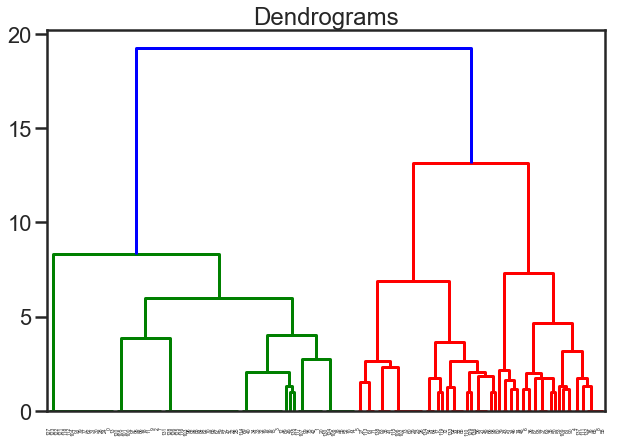

In [20]:
#viz dendrogram to find if three clusters makes sense
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_allgroups_auditqs, method='ward'))

Text(0,0.5,'Silhouette Coefficient')

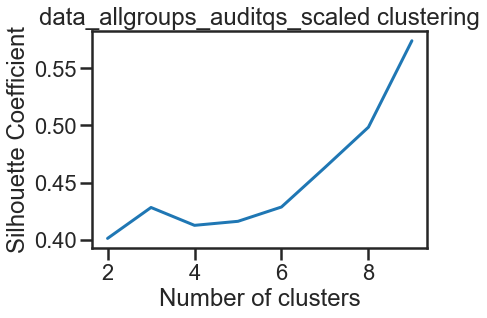

In [21]:
k_range = range(2,10)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(data_allgroups_auditqs)
    scores.append(silhouette_score(data_allgroups_auditqs, km_ss.labels_))

# plot the results
plt.plot(k_range, scores)
plt.title('data_allgroups_auditqs_scaled clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [22]:
km_3 = KMeans(n_clusters=3,random_state=1)
km_3.fit(data_allgroups_auditqs)
data_allgroups_auditqs['kmeans_cluster'] = ["cluster_" + str(label) for label in km_3.labels_ ]
data_allgroups_auditqs.reset_index(inplace=True)
data_allgroups_auditqs.head(1)

TBIID Group  AUDIT1  AUDIT2  AUDIT3 kmeans_cluster
0  C002     C     0.0     0.0     0.0      cluster_1

In [23]:
data_clusters = pd.merge(data, data_allgroups_auditqs[['TBIID', 'Group', 'kmeans_cluster']], on='TBIID', how='outer')
print(data_clusters.shape)
data_clusters.head(1)

(142, 271)


TBIID         DOB GType   Race  Hispanic  Handedness  ScreenAge  Education  Marital  servconn  cestotal  ExpPB  ExpMark1  ExpAntiM  ExpStim  ExpOthrS  ExpDEET  ExpTick  ExpPCollr  ExpPStrp  ExpPEnvi  ExpToxic  ExpPaint  ExpXsVib  ExpHStrk  ExpRadar  ExpIonRa  ExpYCake  ExpVhicl  ExpUrRnd  ExpDtOrd  ExpGasM  ExpMOPP  ExpRadBg  ExpAN  ExpNG  ExpTNT  ExpPETN  ExpRDX  ExpNC  ExpANFO  ExpCompB  ExpOctol  ExpPntlt  ExpDynmt  ExpOthrX  Inhibit_Mean  Shift_Mean  Emotional Control_Mean  Self Monitor_Mean  Initiate_Mean  Working Memory_Mean  Plan/Organize_Mean  BISAtt  BISMtr  BISNonpl  BISTot  CSFPROTEIN_x  CSFGLUCOSE  CSFRBCS  MHxPain  MHxHA  MHxHtn  MHxCard  MHxGI  MHxNeuro  MHxLung  MHxApnea  SCPTSD  SCMDD  SCPD  SCGAD  SCNone  HYPERTEN  HYPERCHO  DIABETES  B12DEF  THYROID  DvpVers  DvpHA  DvpHAAct  DvpHASlp  DvpHAMd  DvpHAStr  DvpBP  DvpBPAct  DvpBPslp  DvpBPMd  DvpBPStr  HEIGHT  HEIGDEC  WEIGHT   BMI  BPSYS  BPDIAS  HRATE  QKOIorA  QKOExpMil  QKOAllMil  QKOLife  QBlstExp  QBEACRM  \
0  C002  1968-12-06   M12  White       0.0         2.0         26       12.0  Married       0.0       7.0    0.0       0.0       0.0      0.0       0.0      1.0      0.0        0.0       0.0       0.0       0.0       0.0       1.0       0.0       1.0       0.0       0.0       2.0       0.0       0.0      0.0      0.0       0.0    0.0    0.0     0.0      0.0     0.0    0.0      1.0       0.0       0.0       0.0       0.0       0.0           NaN         NaN                     NaN                NaN            NaN                  NaN                 NaN     NaN     NaN       NaN     NaN          52.0        50.0      1.0      0.0    1.0     0.0      0.0    0.0       0.0      0.0       0.0     0.0    0.0   0.0    0.0     1.0       0.0       0.0       0.0     0.0      0.0      NaN    NaN       NaN       NaN      NaN       NaN    NaN       NaN       NaN      NaN       NaN    75.0      0.0   268.0  33.5  142.0    92.0   54.0      0.0        0.0        0.0      0.0       0.0      0.0   

   Q5plus2  MnthSncBlst  QEDist1  QEDist2  QEDist3  QEDist4  QEDist5  capsCrtA  b1f  b1i  b2f  b2i  b3f  b3i  b4f  b4i  b5f  b5i  c6f  c6i  c7f  c7i  c8f  c8i  c9f  c9i  c10f  c10i  c11f  c12f  c12i  d13f  d13i  d14f  d14i  d15f  d15i  d16f  d16i  d17f  d17i  f20  f21  f22  caps23  caps24  caps25  caps26f  caps26i  caps27f  caps27i  caps28f  caps28i  caps29f  caps29i  caps30f  caps30i  CAPSTotal  hrslp  PSQI1hr  PSQI1min  PSQI2  PSQI3hr  PSQI3min  PSQI5a  PSQI5b  PSQI5c  PSQI5d  PSQI5e  PSQI5f  PSQI5g  PSQI5h  PSQI5i  PSQI5j PSQI5jco  PSQI6  PSQI7  PSQI8  PSQI9  PSQIc1  PSQIc2  PSQIc3  PSQIc4  PSQIc5  PSQIc6  PSQIc7  PSQItot  PCL1  PCL2  PCL3  PCL4  PCL5  PCL6  PCL7  PCL8  PCL9  PCL10  PCL11  PCL12  PCL13  PCL14  PCL15  PCL16  PCL17  PCLTot  PHQ1  PHQ2  PHQ3  PHQ4  PHQ5  PHQ6  PHQ7  PHQ8  PHQ9  PHQTot  auditc  tbiDizzy  tbiBalan  tbiCoord  tbiHeada  tbiNaus  tbiVision  tbiLight  tbiHear  tbiNoise  tbiTingl  tbiTstsml  tbiAppet  tbiConc  tbiForget  tbiDecis  tbiSlow  tbiEnergy  \
0      0.0          NaN      NaN      NaN      NaN      NaN      NaN       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  NaN  NaN  NaN     0.0     0.0     NaN      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0        0.0    9.5     21.0       0.0   10.0      7.0       0.0     1.0     0.0     0.0     0.0     0.0     1.0     1.0     0.0     0.0     NaN      NaN    0.0    0.0    0.0    1.0     0.0     1.0     0.0     0.0     1.0     0.0     1.0      3.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    17.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     0.0     0.0       0.0       0.0       0.0       0.0      0.0        0.0       0.0      0.0       0.0       0.0        0.0       0.0      0.0        0.0       0.0      0.0        0.0   

   tbiSleep  tbiAnx 

In [24]:
data_clusters.groupby('Group')['kmeans_cluster'].value_counts()

Group  kmeans_cluster
C      cluster_2         19
       cluster_1         10
       cluster_0          5
T      cluster_2         36
       cluster_1         35
       cluster_0         34
Name: kmeans_cluster, dtype: int64

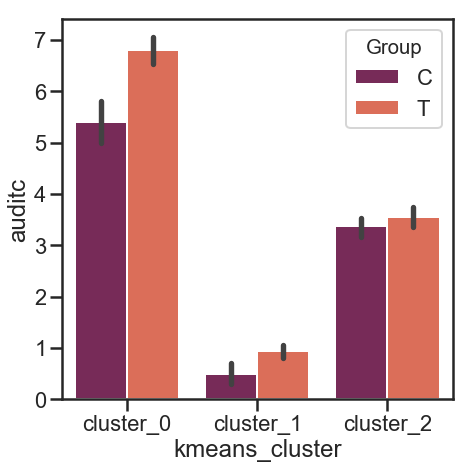

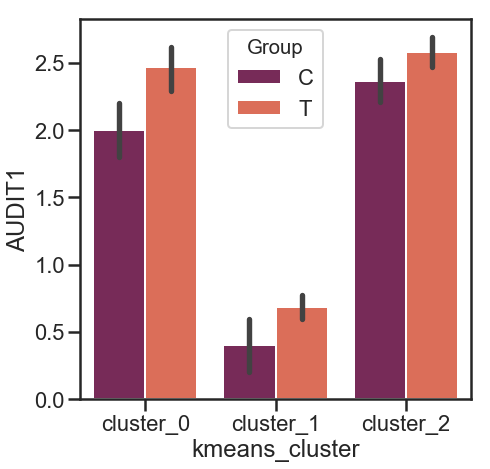

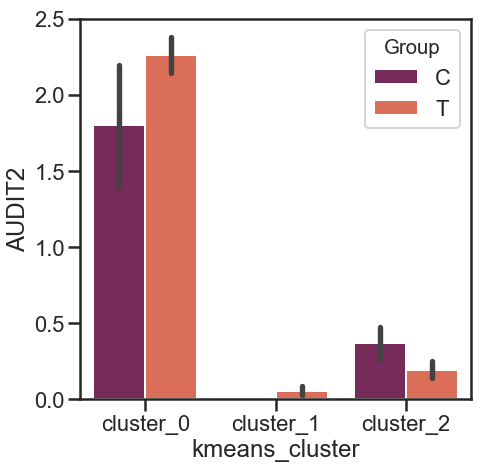

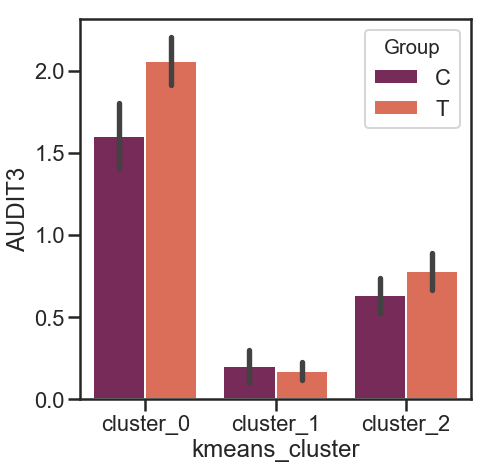

In [25]:
#plt.style.use('seaborn-white')
auditc_cols = ['auditc', 'AUDIT1', 'AUDIT2', 'AUDIT3']
for variable in auditc_cols:
    try:
        plt.figure(figsize=(7,7))
        g = sns.barplot(x='kmeans_cluster', y=variable, data=data_clusters, ci=68, hue='Group', palette="rocket", order=["cluster_0", "cluster_1", "cluster_2"])
        plt.show()
    except:
        pass

In [26]:
data_clusters.to_csv('data_auditc_clustering.csv')

In [28]:
AUDIT_tot_counts_cluster = data_clusters.groupby(['Group', 'kmeans_cluster'])['auditc'].value_counts()
AUDIT_1_counts_cluster = data_clusters.groupby(['Group', 'kmeans_cluster'])['AUDIT1'].value_counts()
AUDIT_2_counts_cluster = data_clusters.groupby(['Group', 'kmeans_cluster'])['AUDIT2'].value_counts()
AUDIT_3_counts_cluster = data_clusters.groupby(['Group', 'kmeans_cluster'])['AUDIT3'].value_counts()
AUDIT_tot_counts_cluster.to_csv('AUDIT_tot_counts_cluster.csv')
AUDIT_1_counts_cluster.to_csv('AUDIT_1_counts_cluster.csv')
AUDIT_2_counts_cluster.to_csv('AUDIT_2_counts_cluster.csv')
AUDIT_3_counts_cluster.to_csv('AUDIT_3_counts_cluster.csv')

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

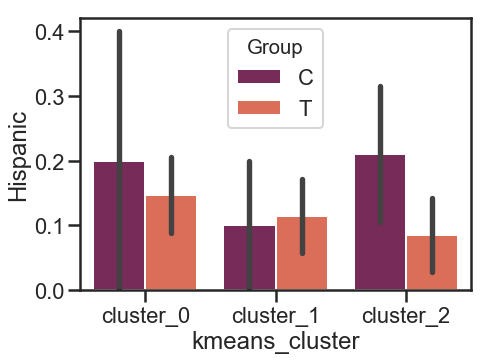

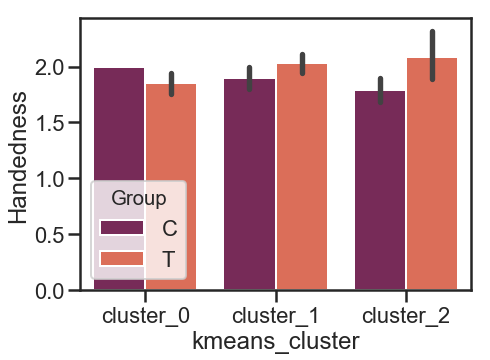

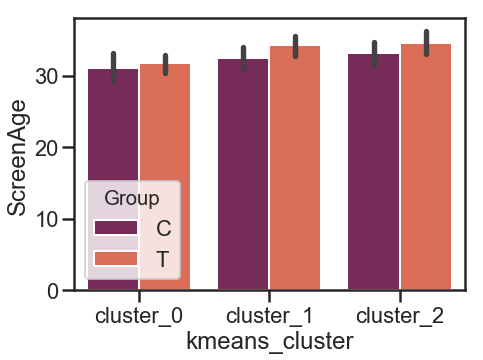

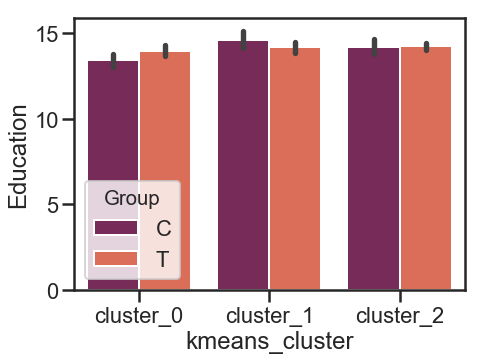

<Figure size 504x360 with 0 Axes>

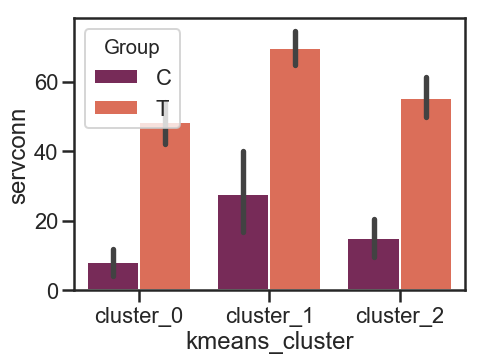

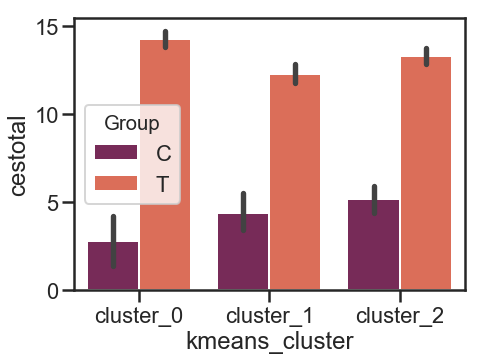

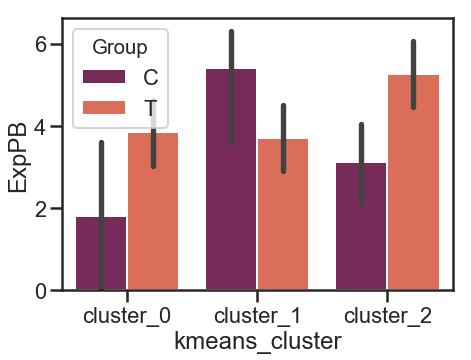

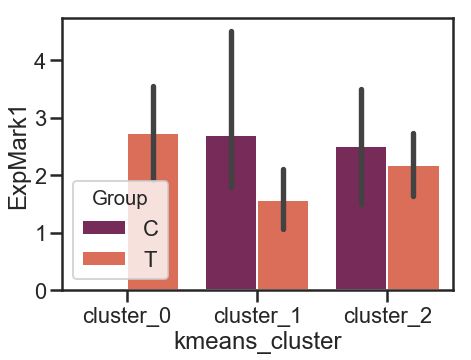

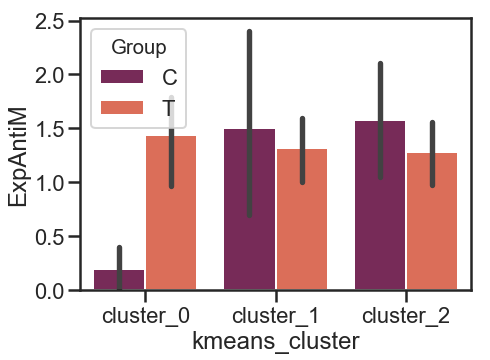

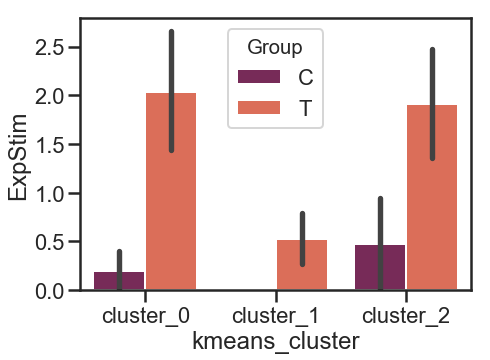

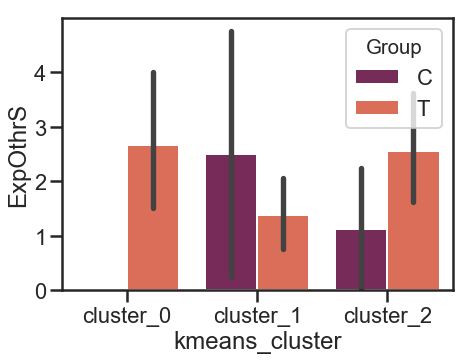

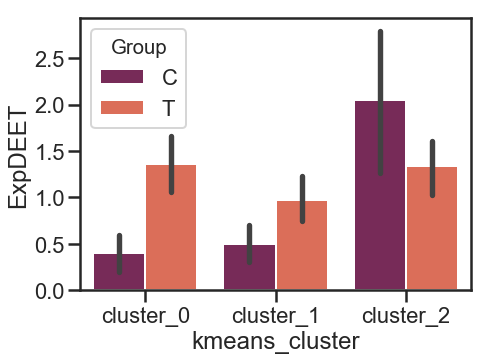

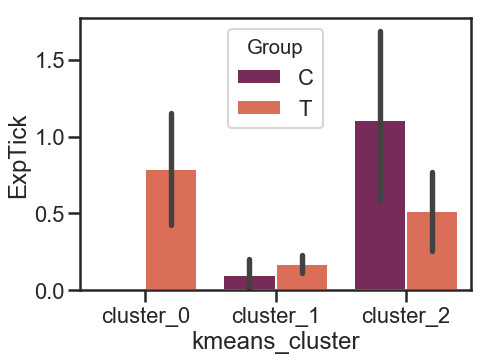

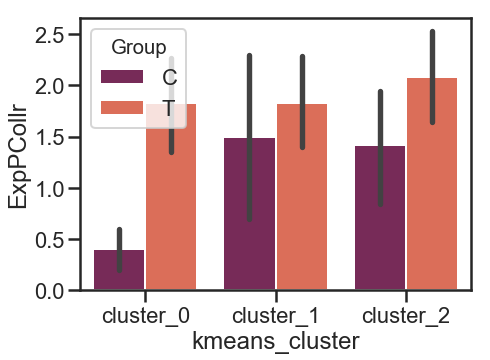

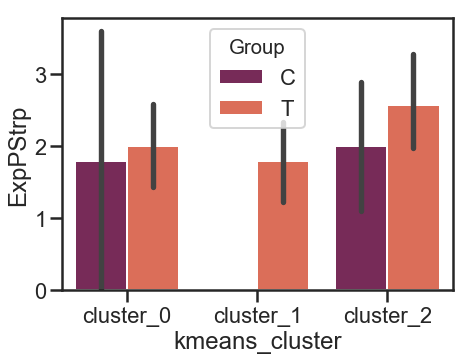

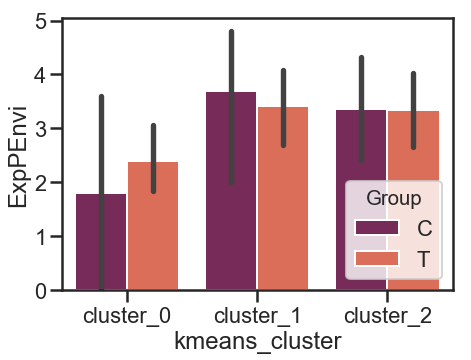

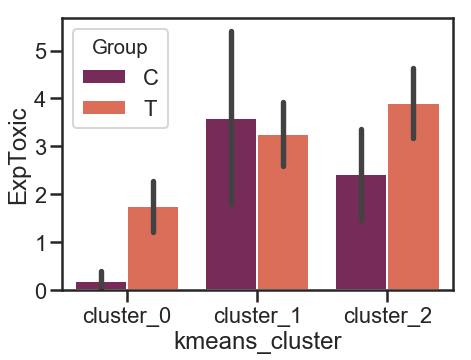

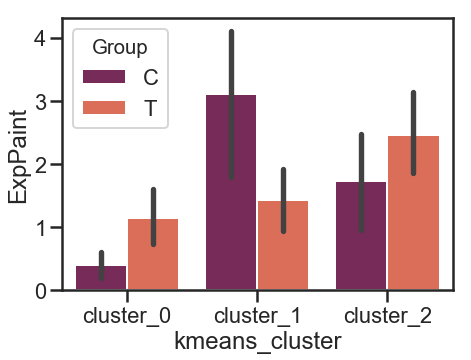

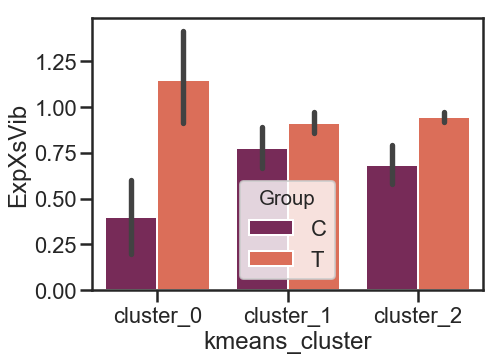

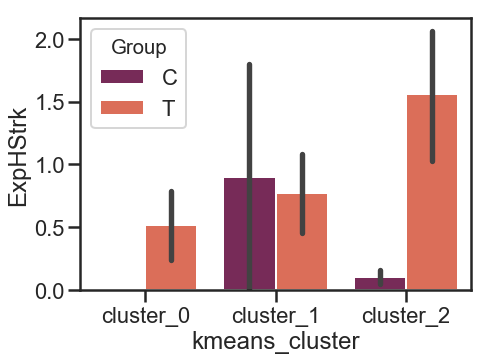

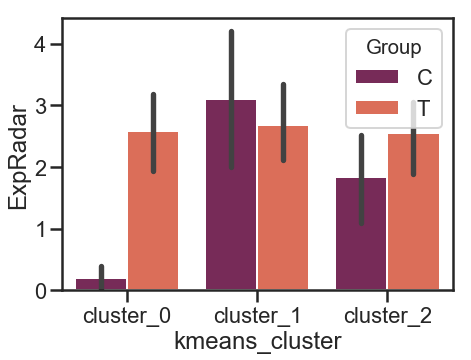

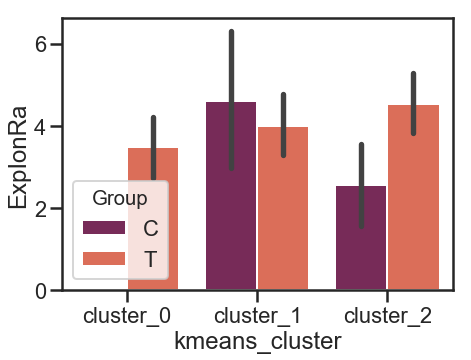

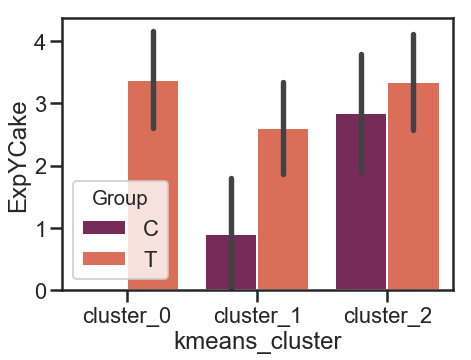

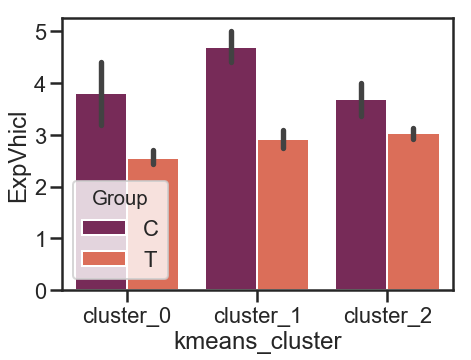

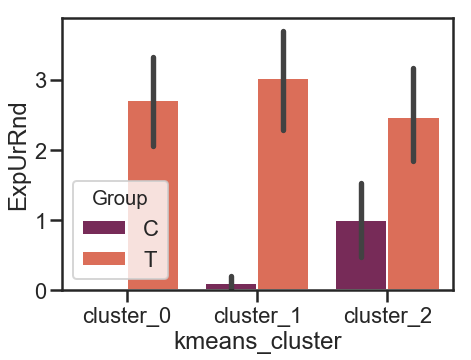

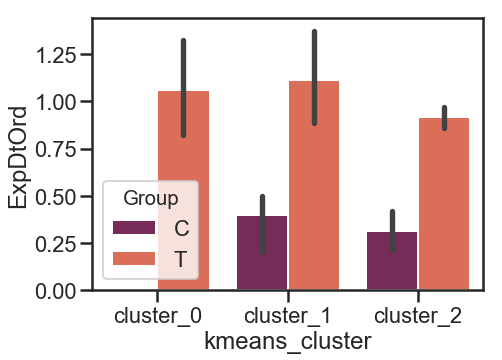

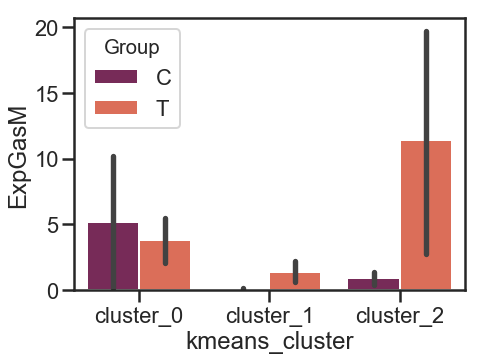

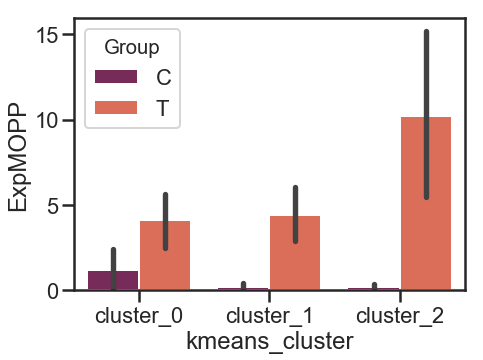

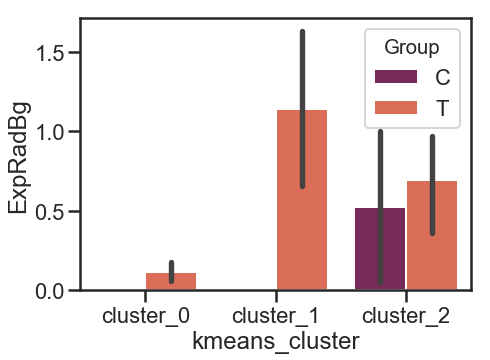

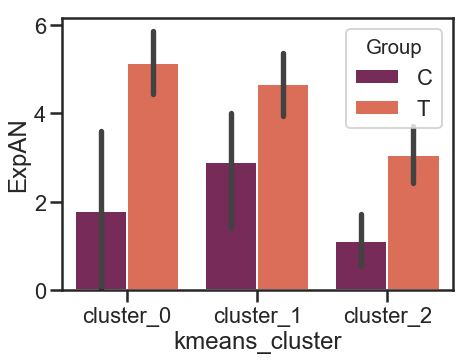

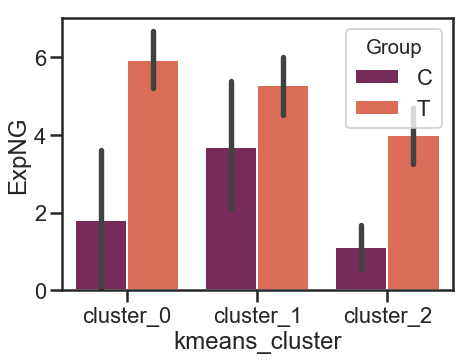

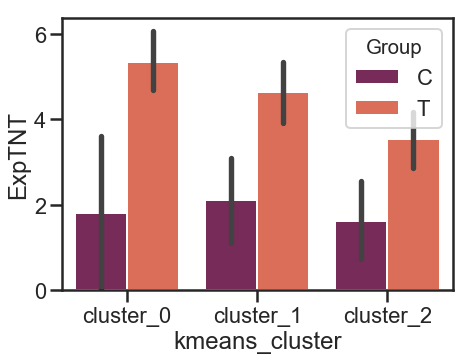

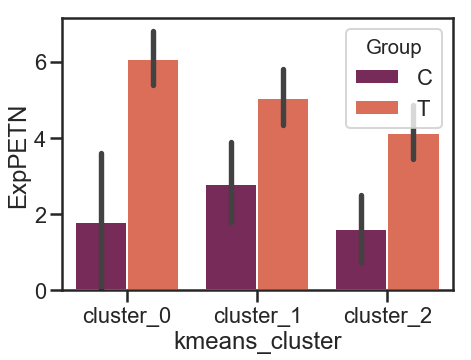

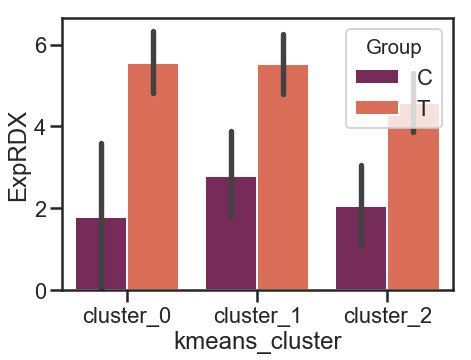

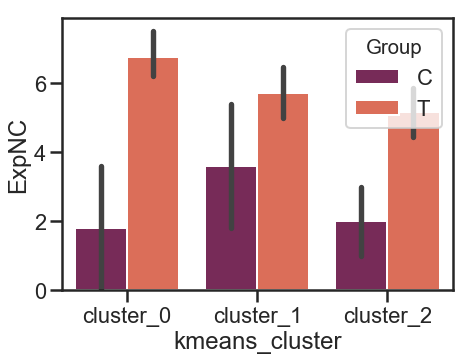

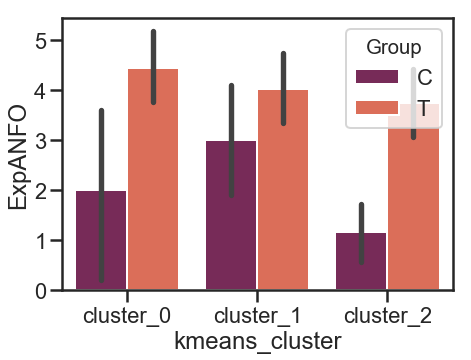

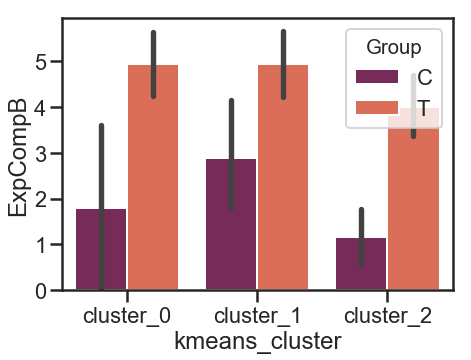

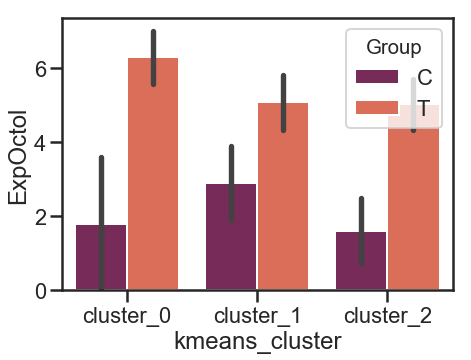

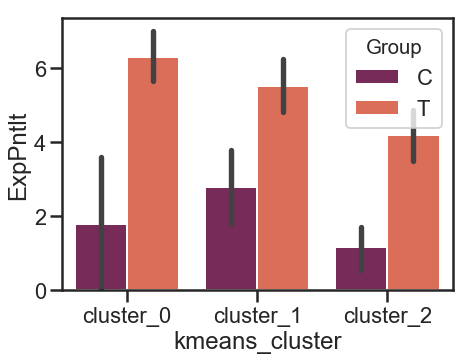

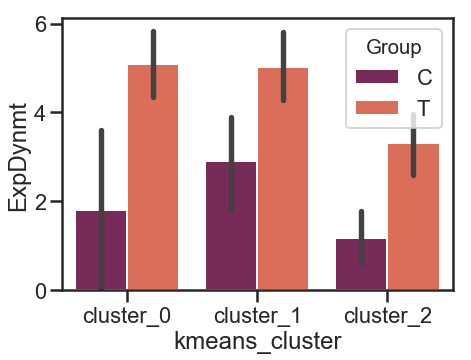

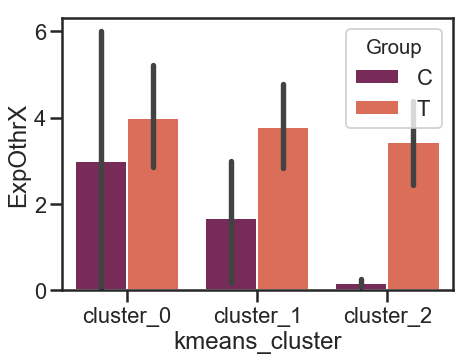

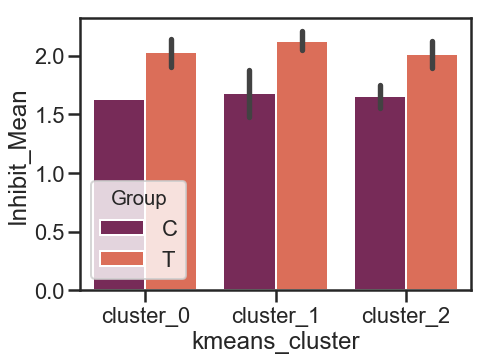

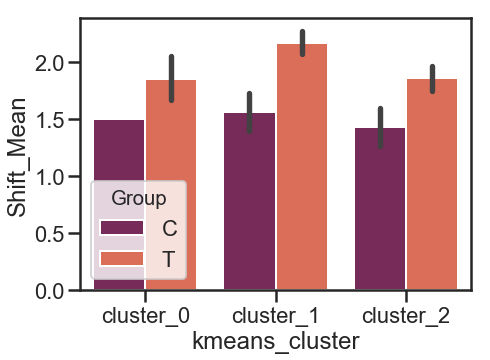

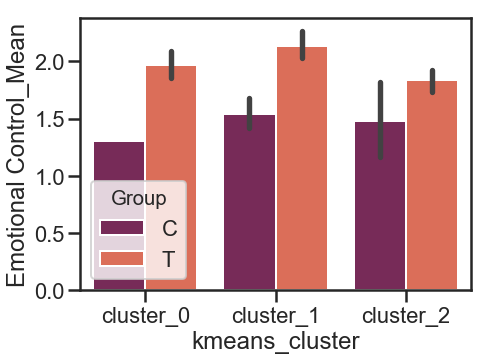

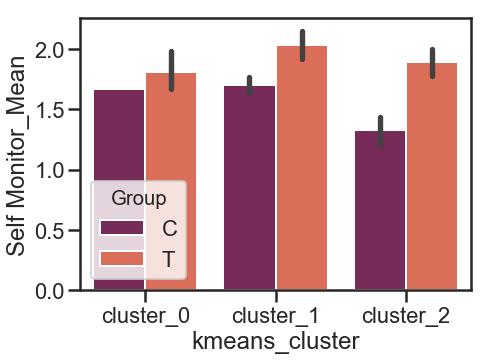

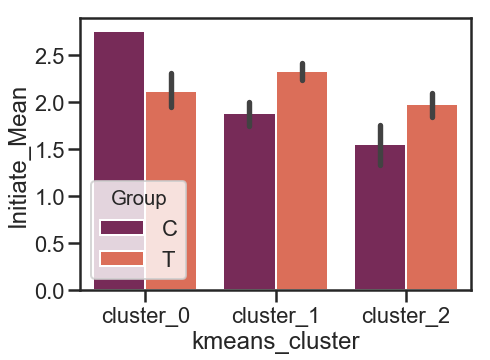

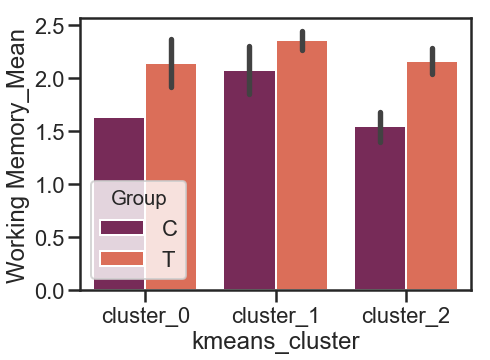

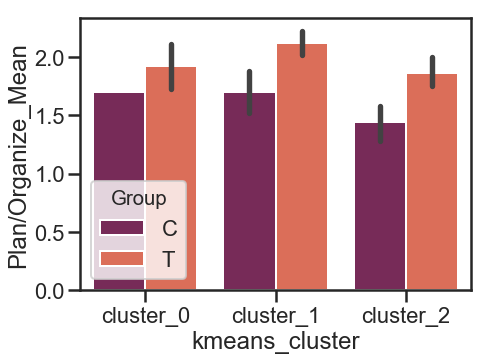

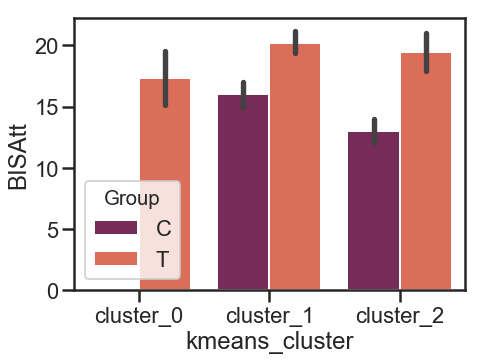

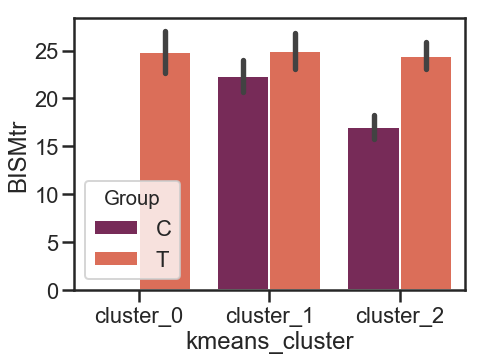

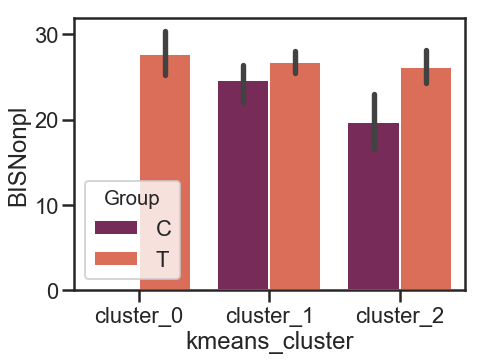

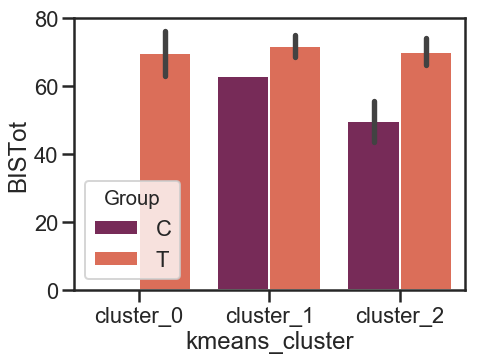

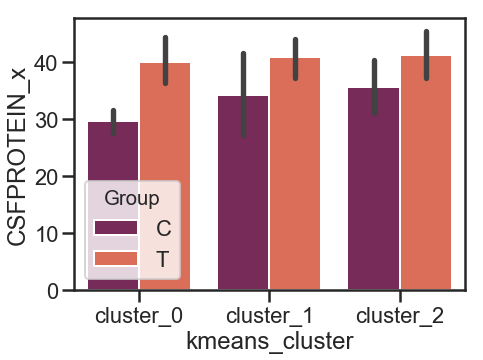

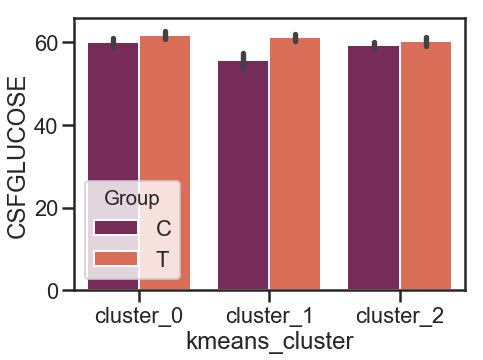

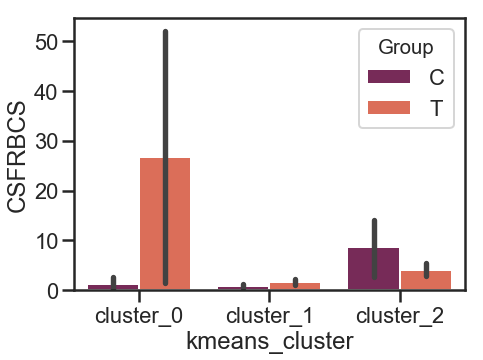

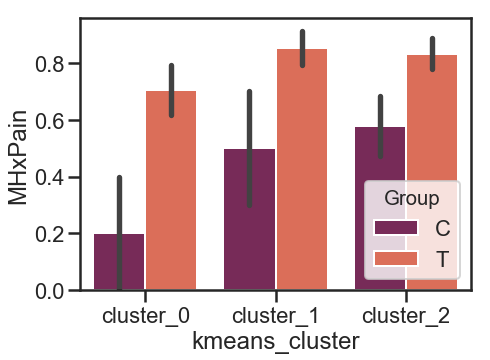

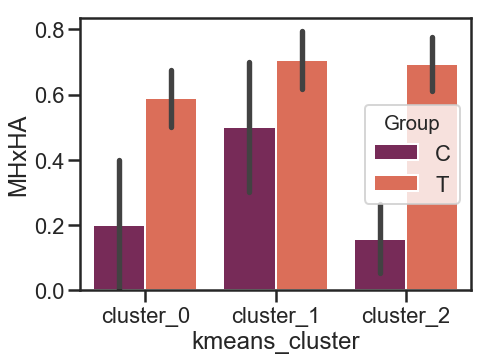

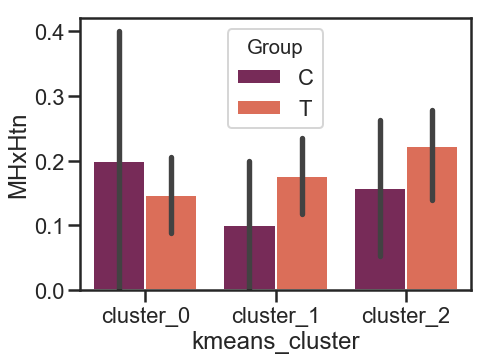

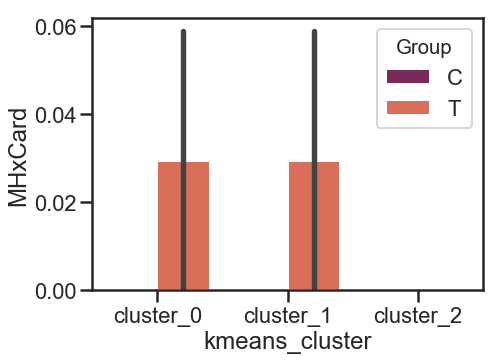

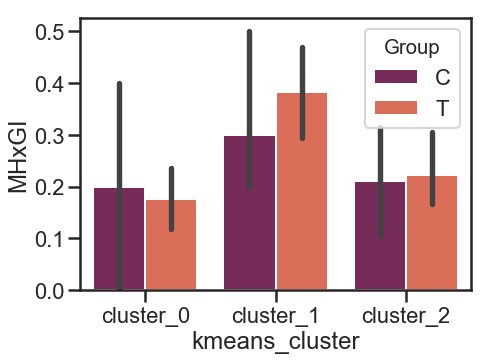

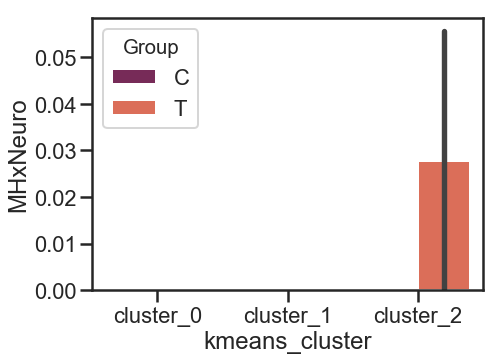

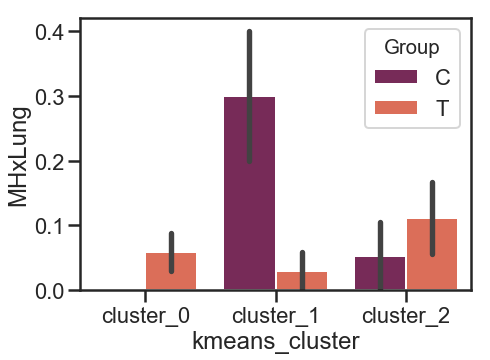

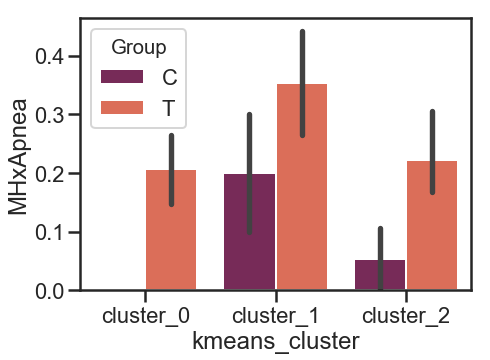

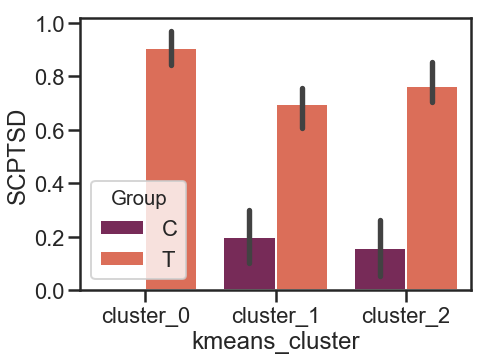

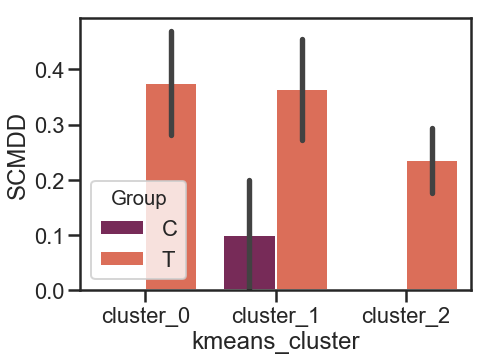

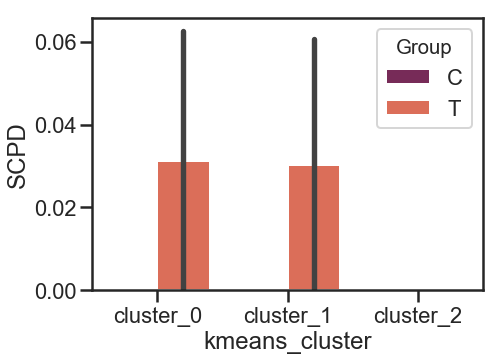

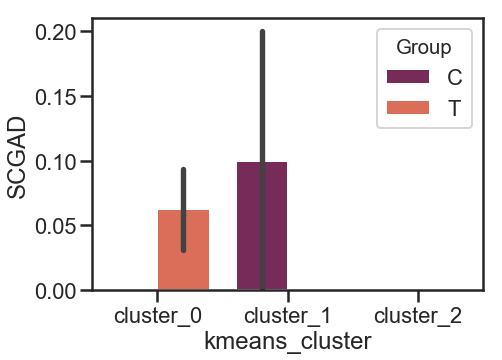

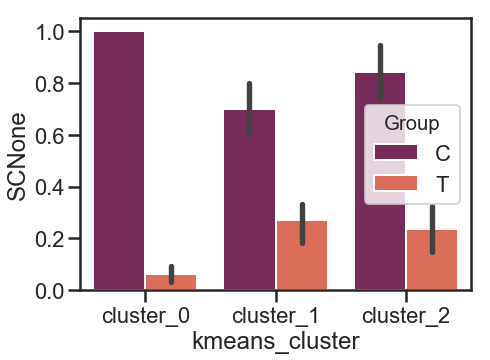

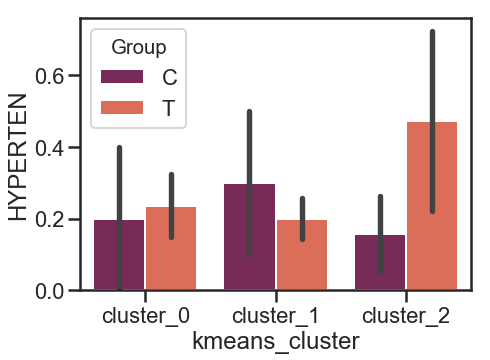

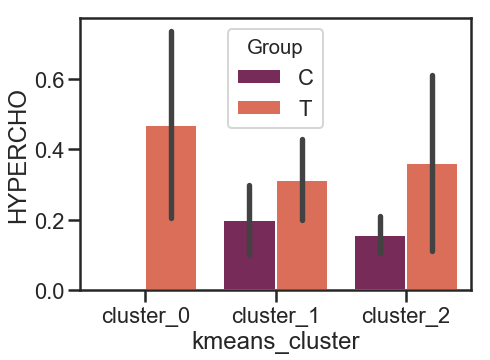

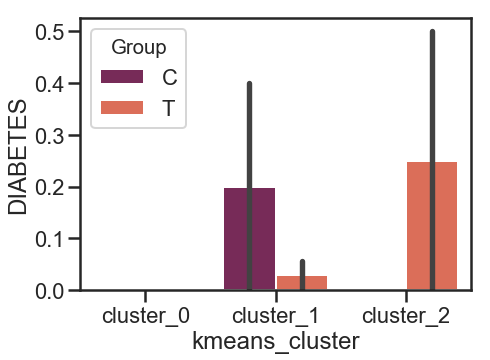

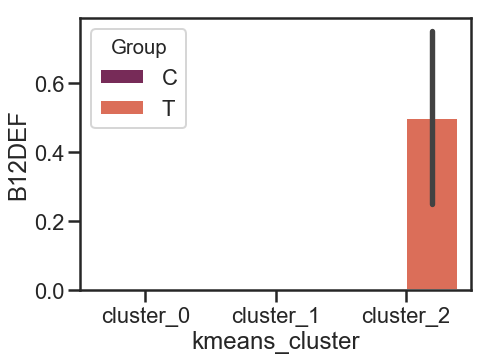

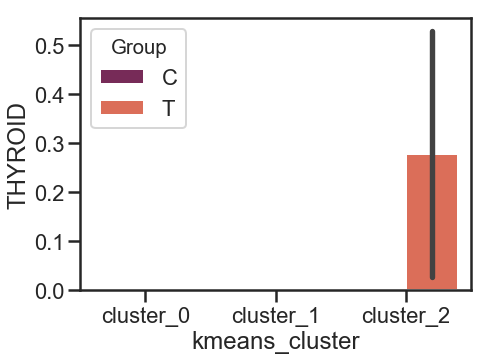

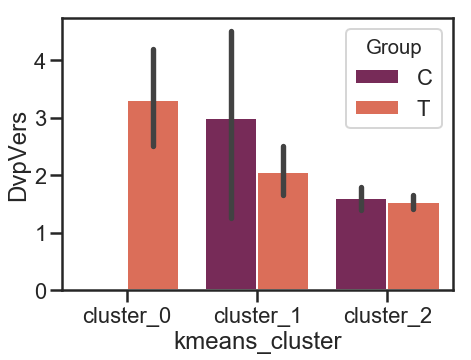

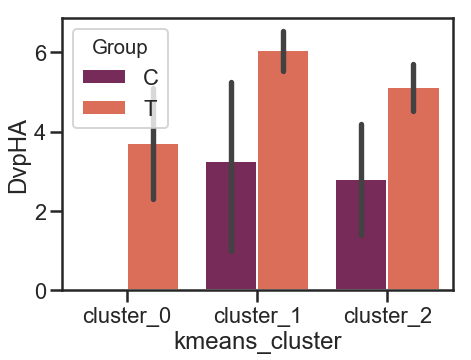

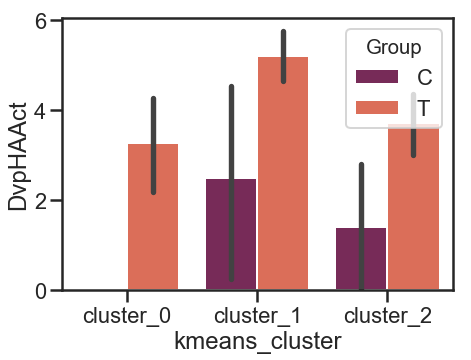

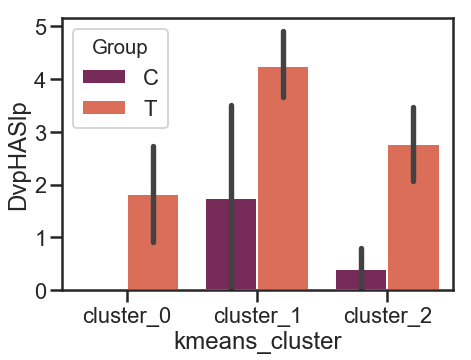

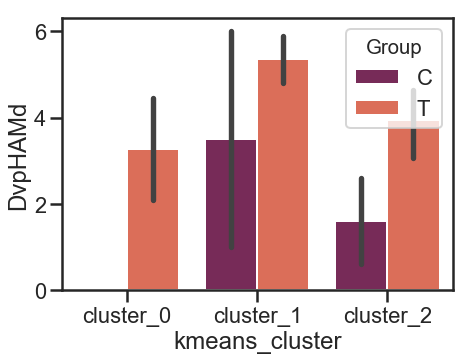

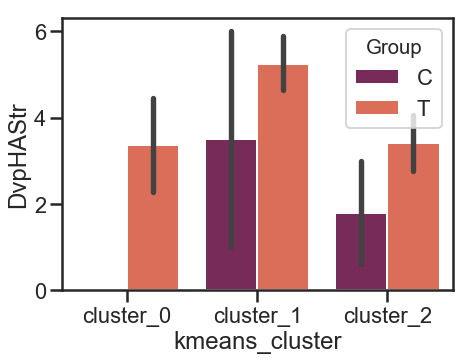

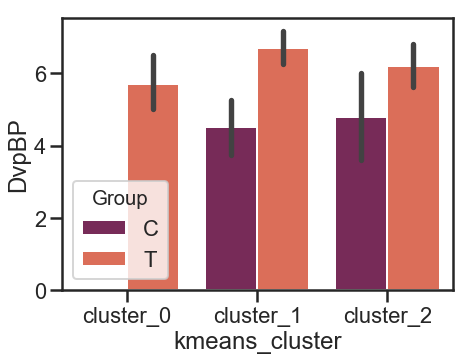

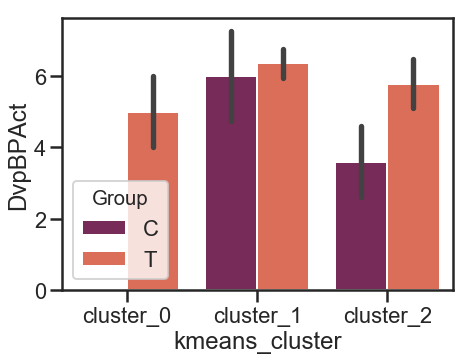

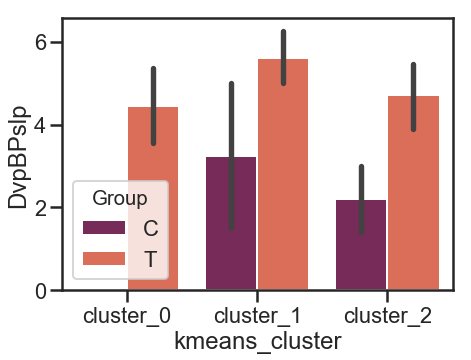

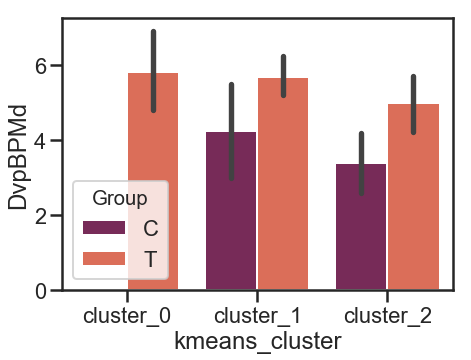

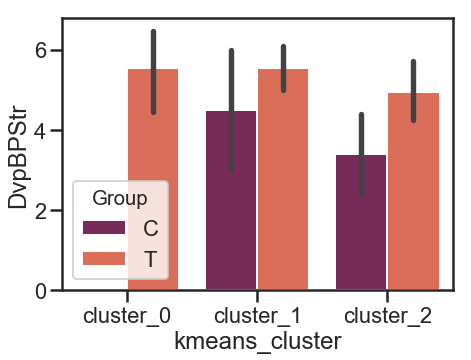

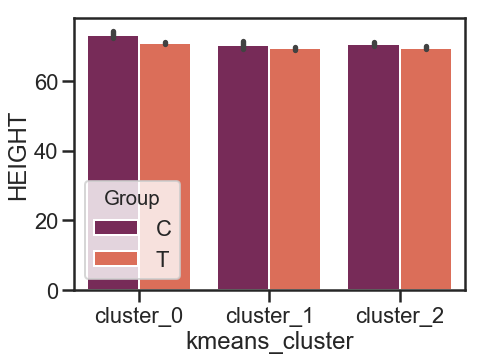

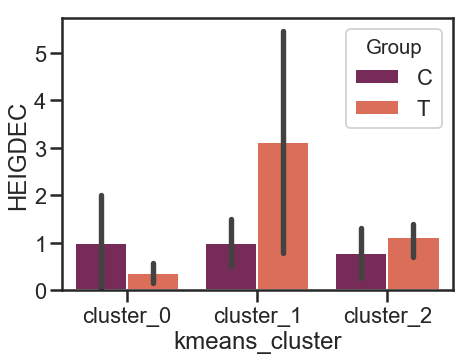

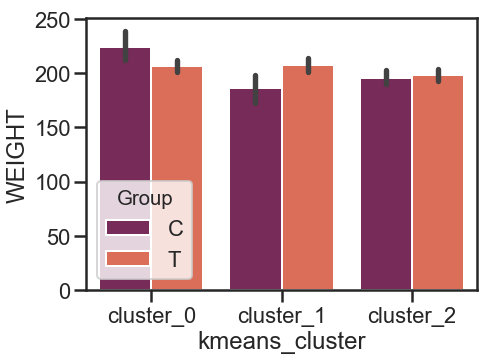

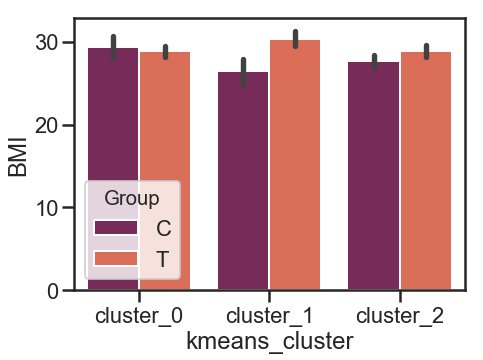

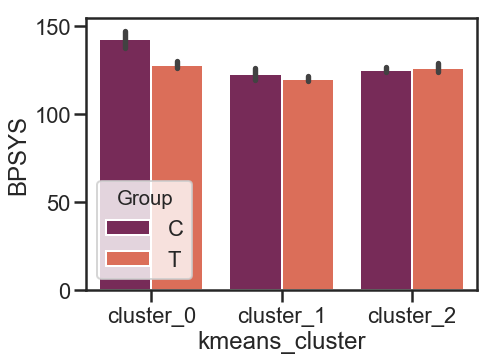

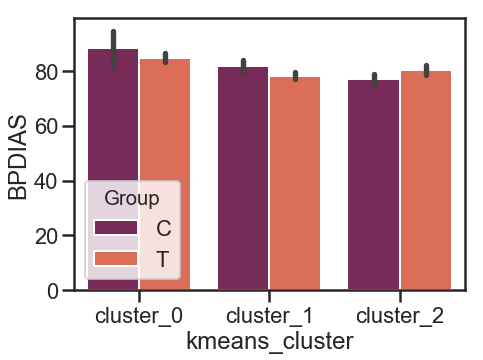

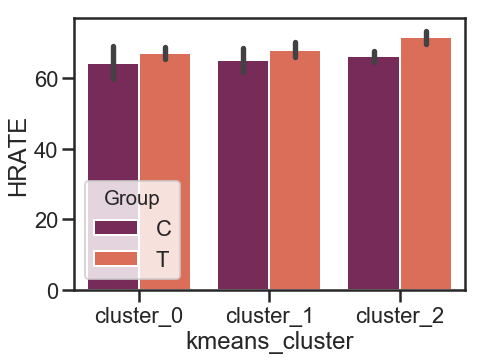

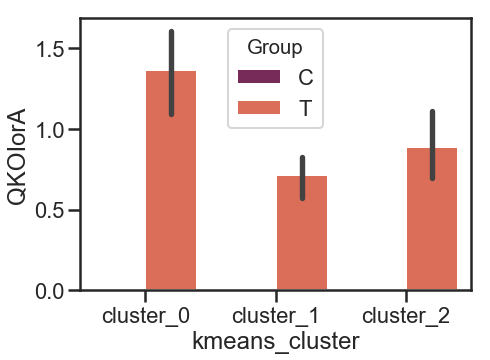

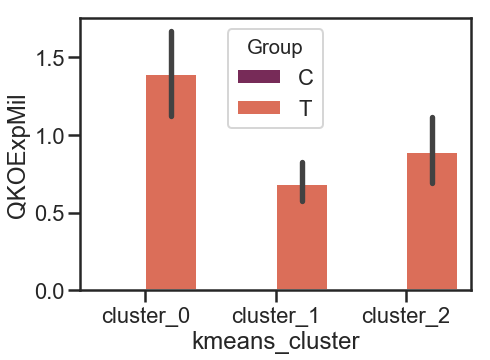

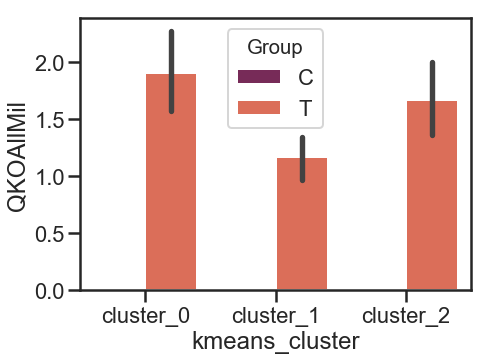

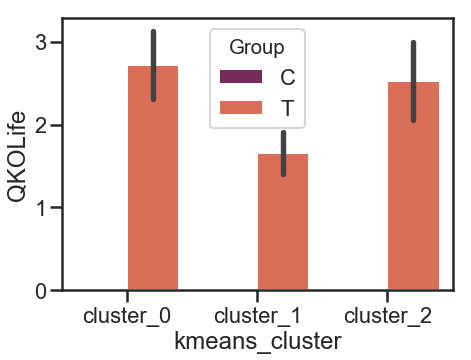

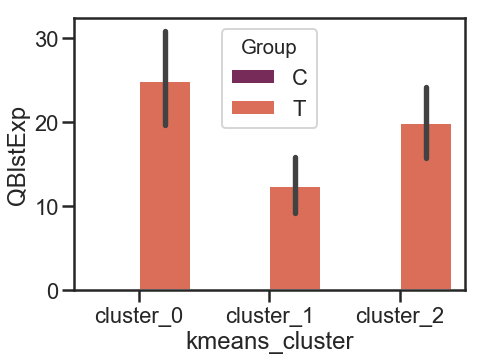

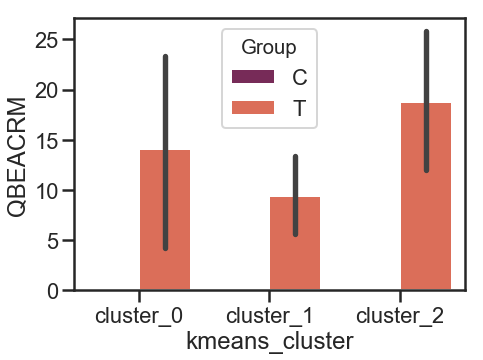

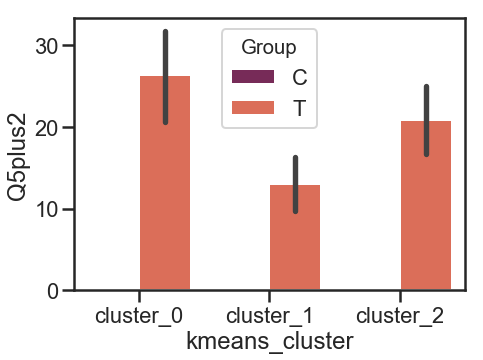

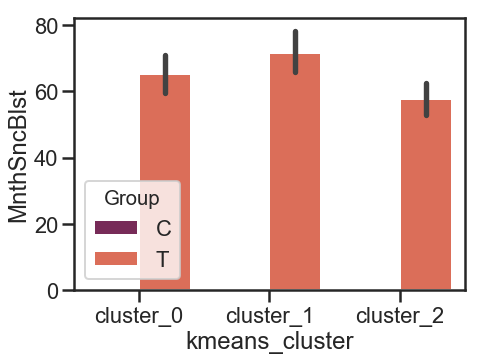

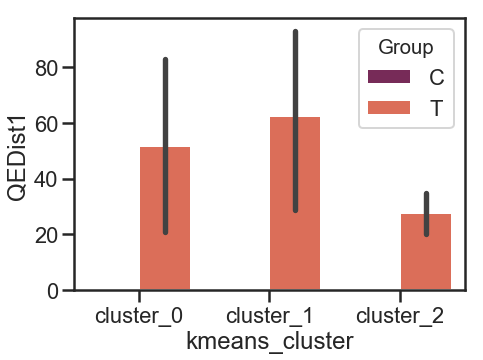

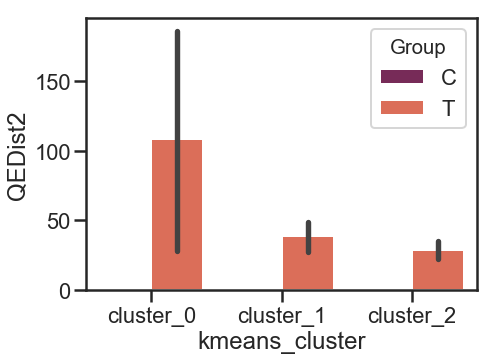

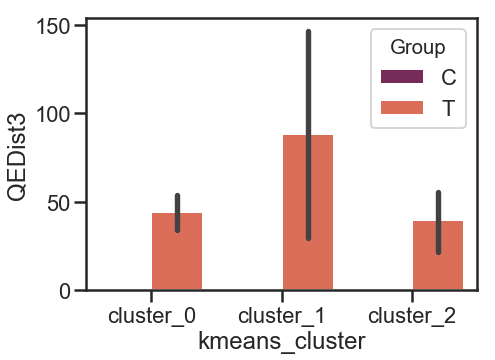

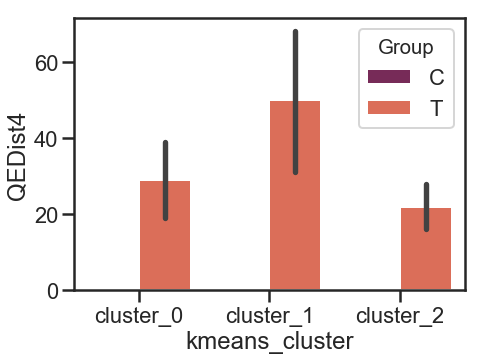

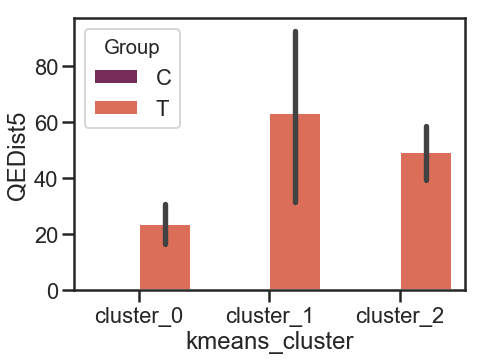

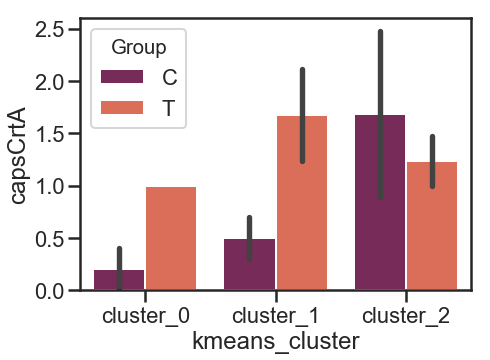

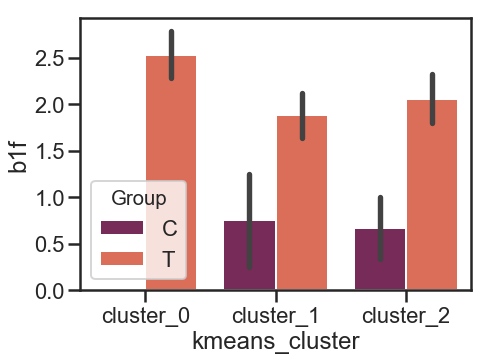

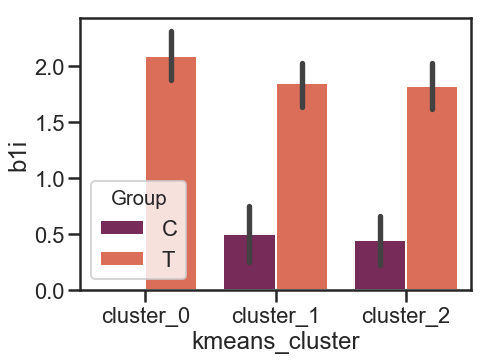

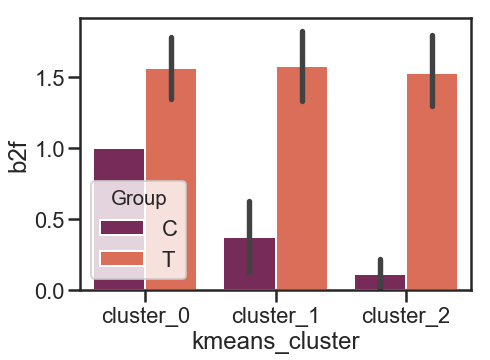

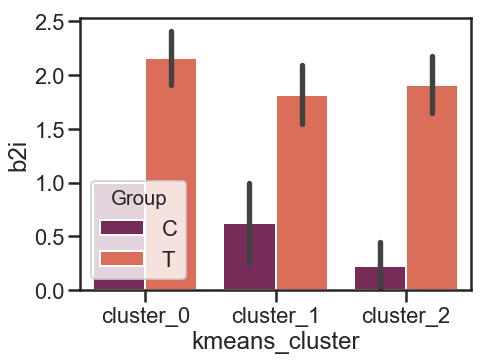

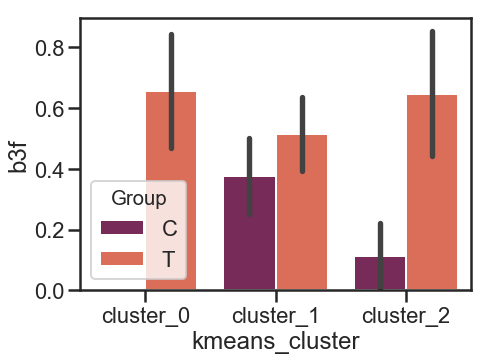

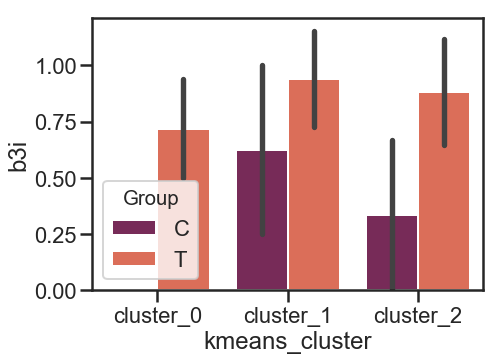

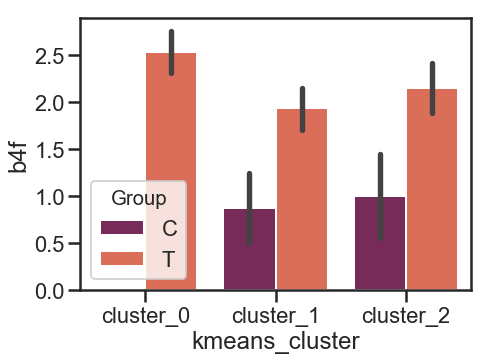

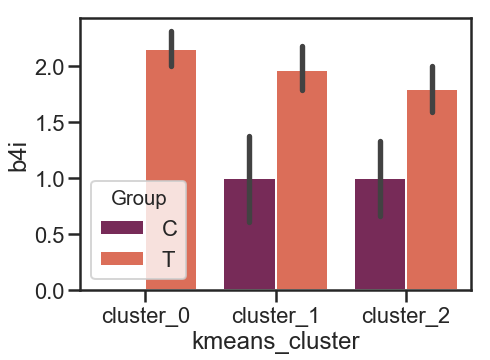

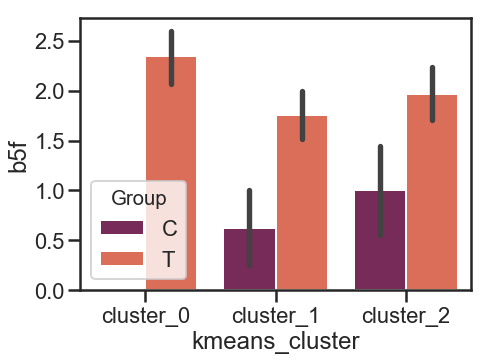

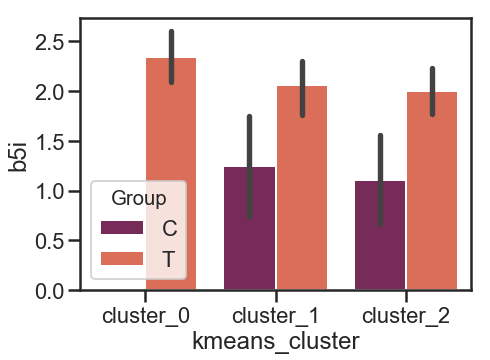

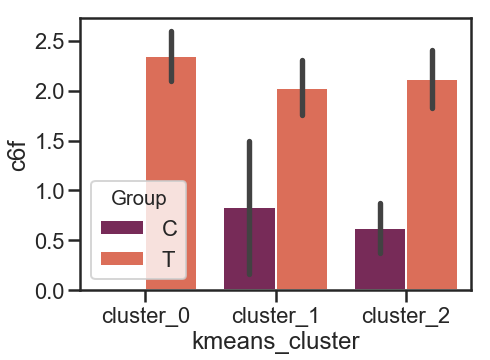

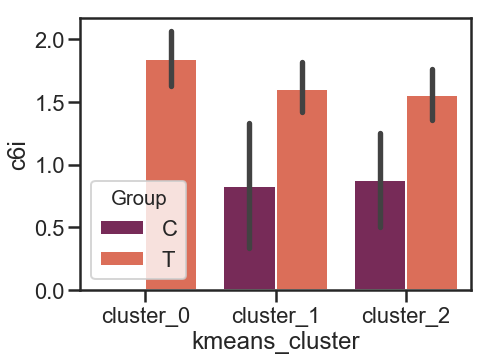

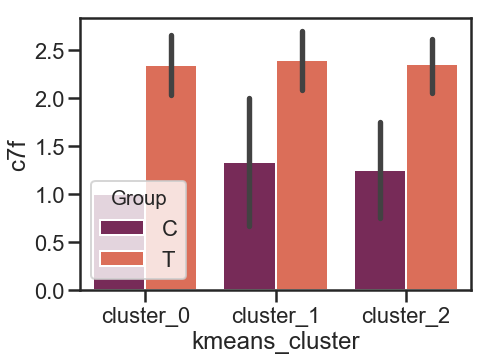

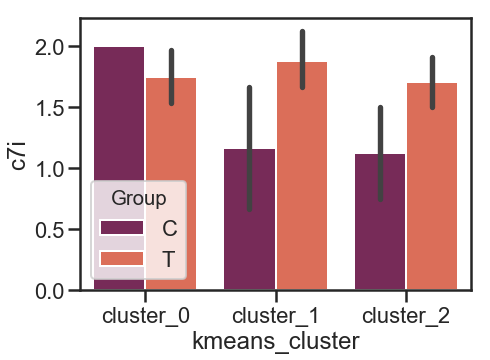

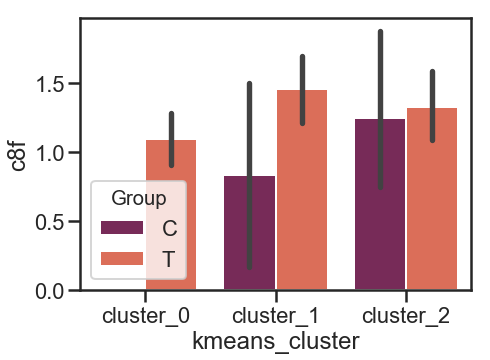

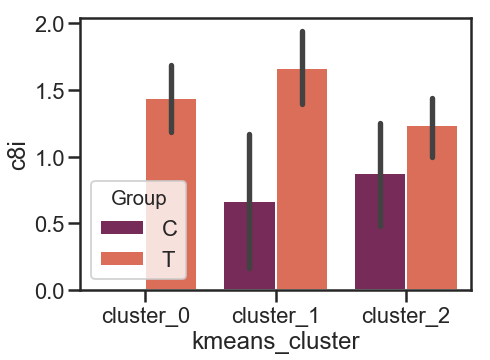

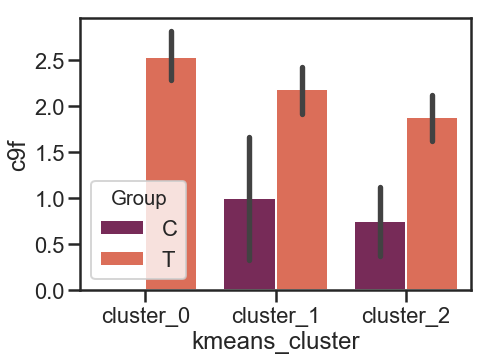

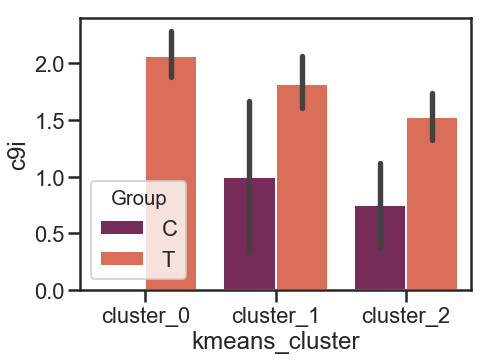

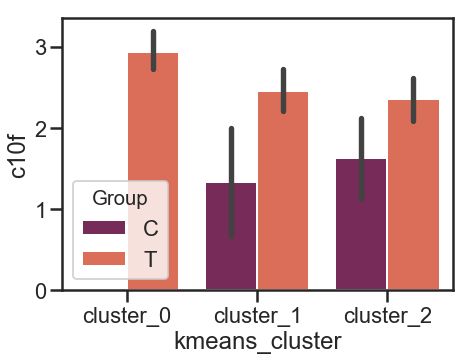

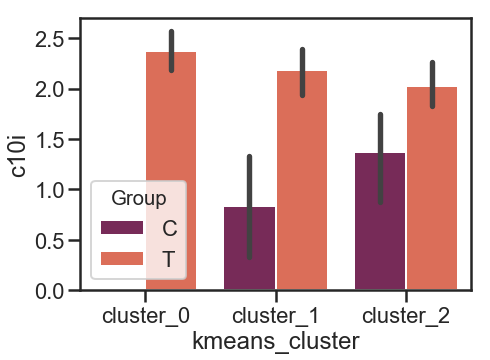

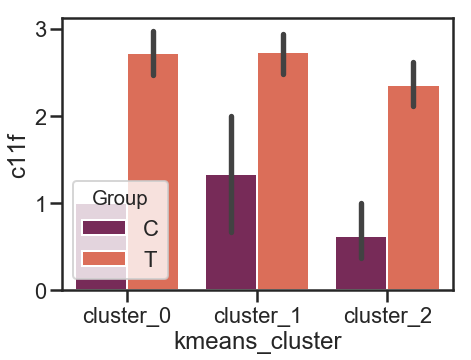

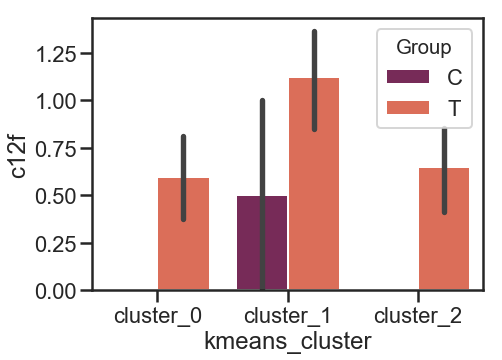

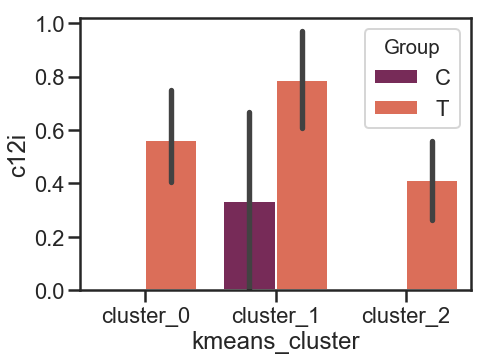

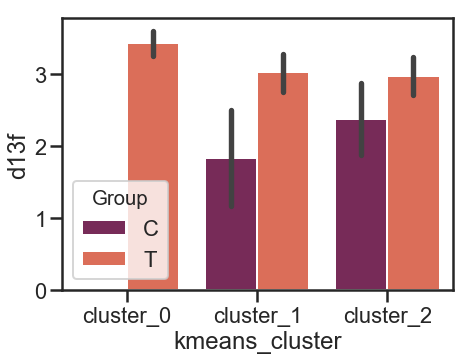

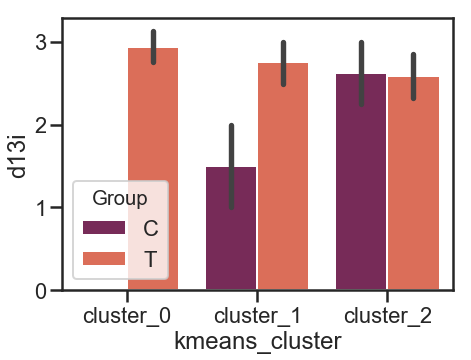

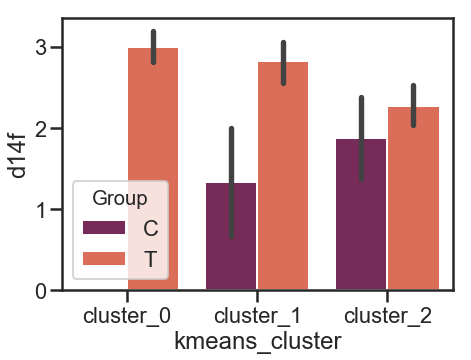

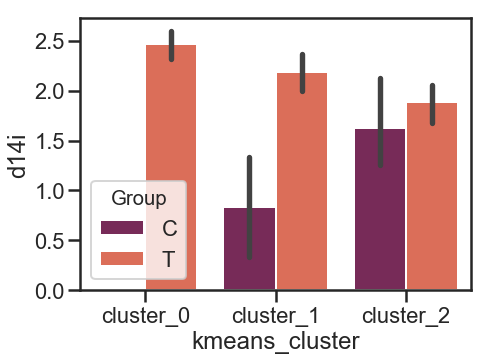

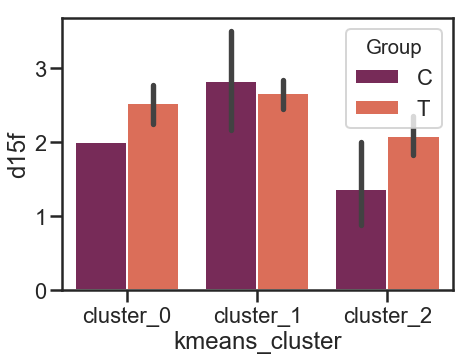

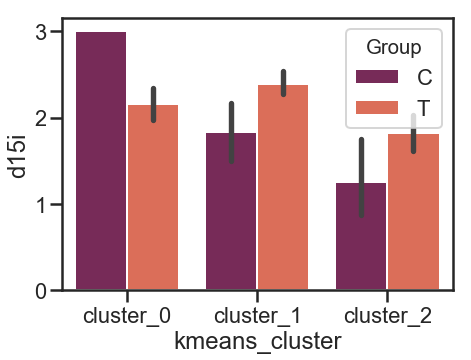

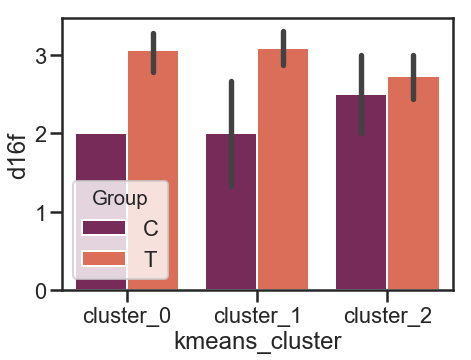

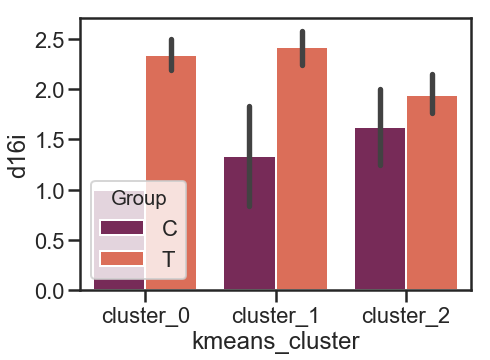

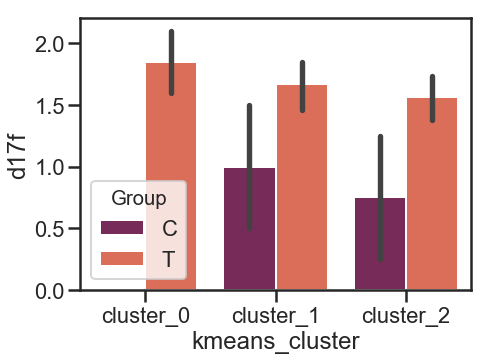

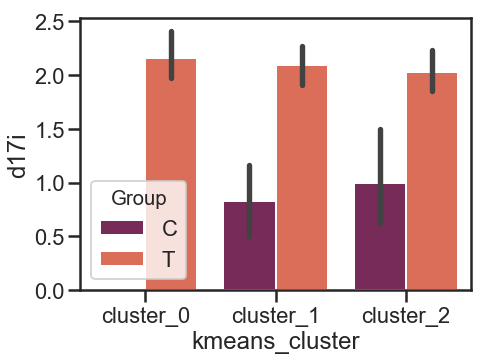

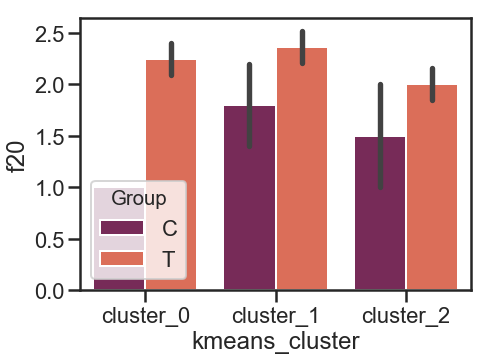

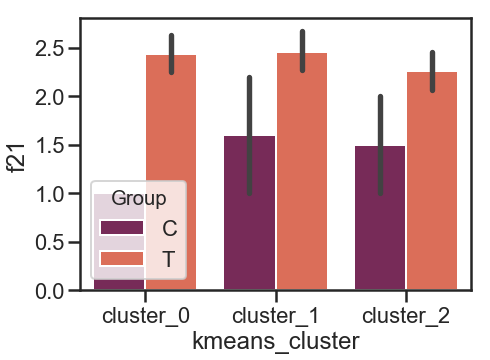

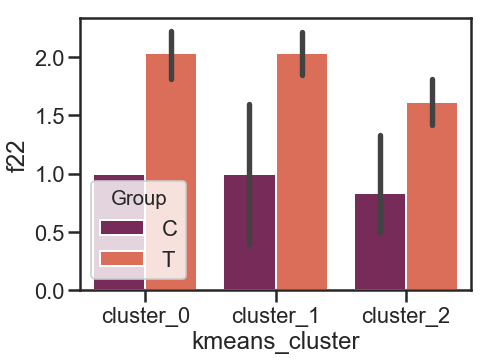

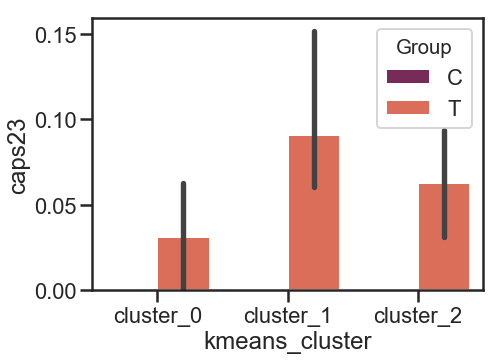

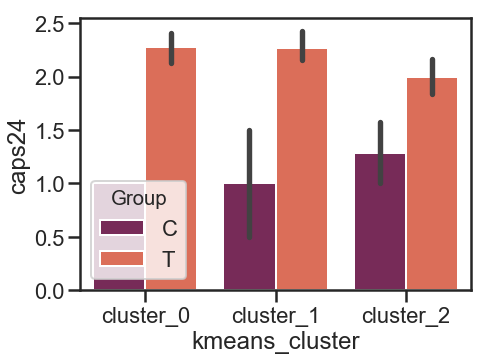

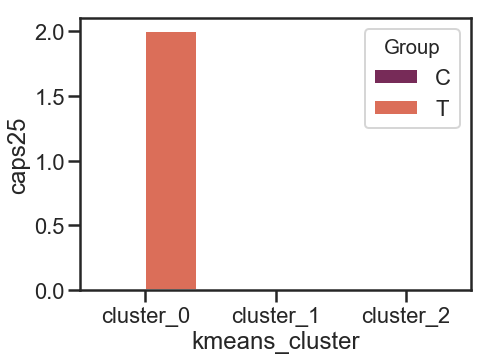

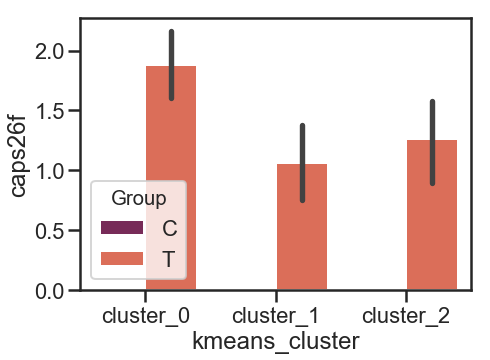

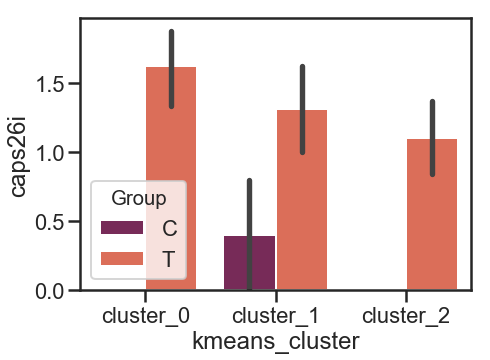

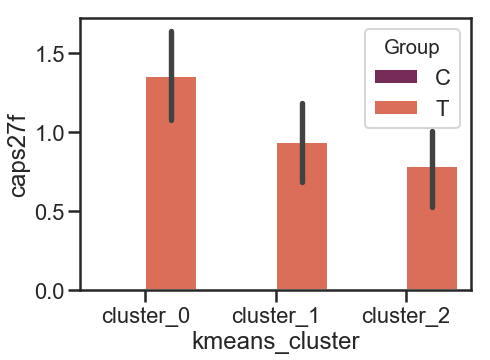

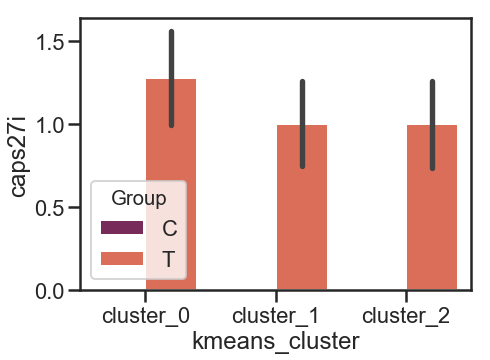

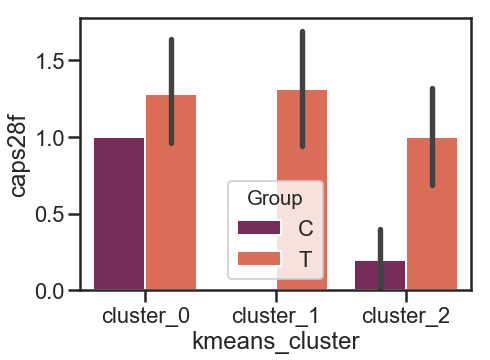

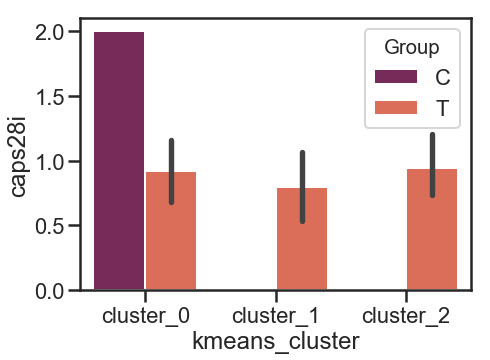

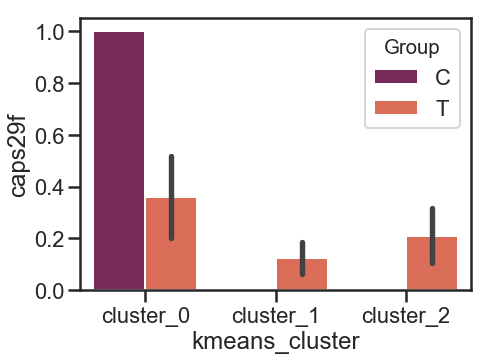

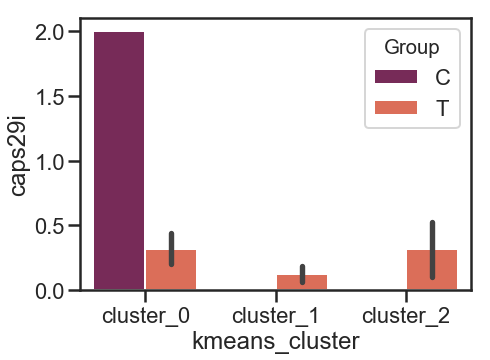

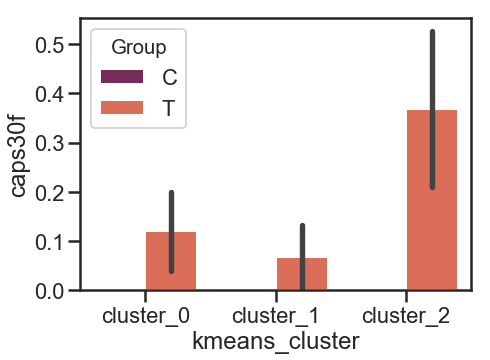

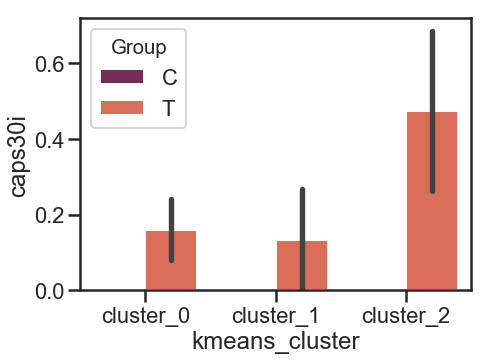

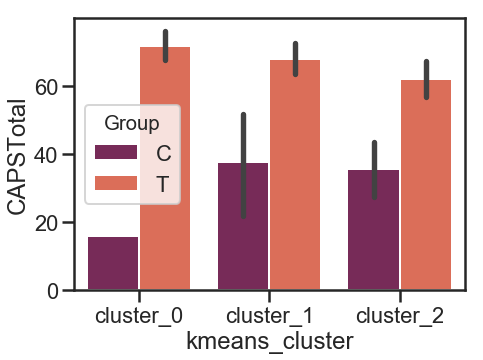

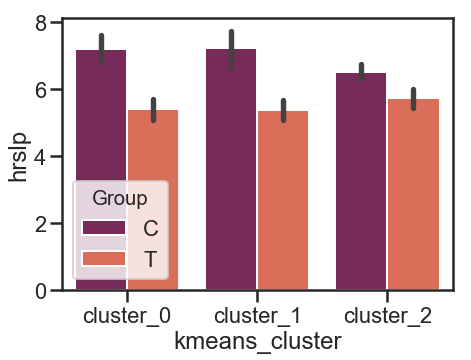

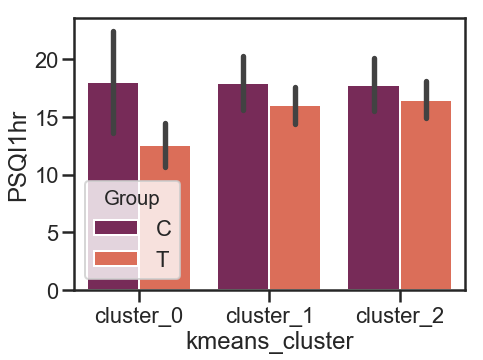

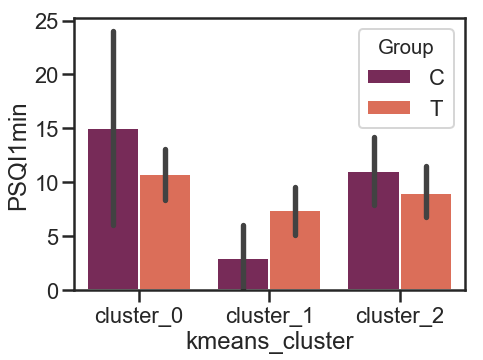

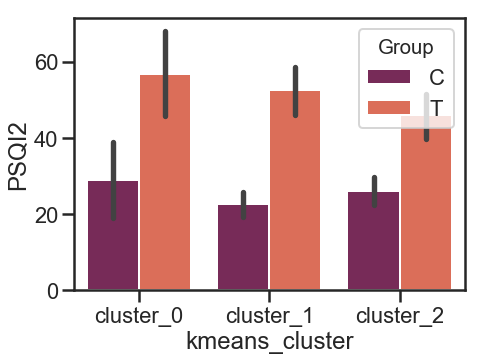

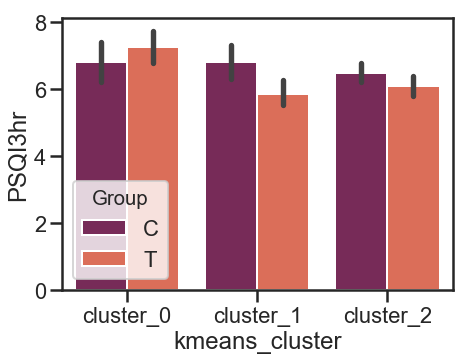

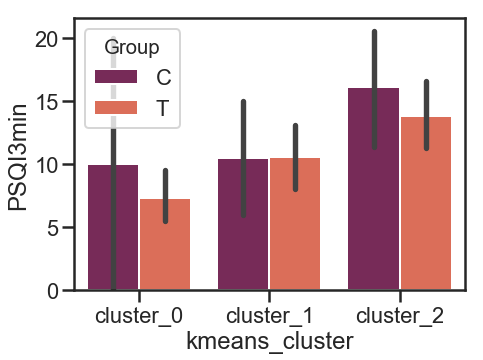

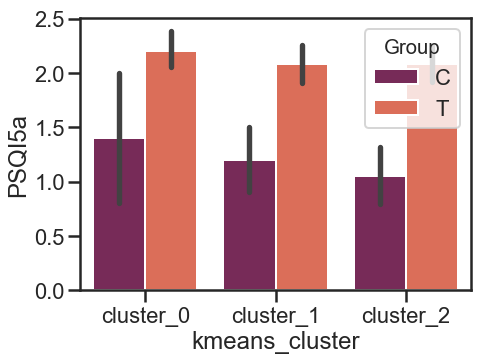

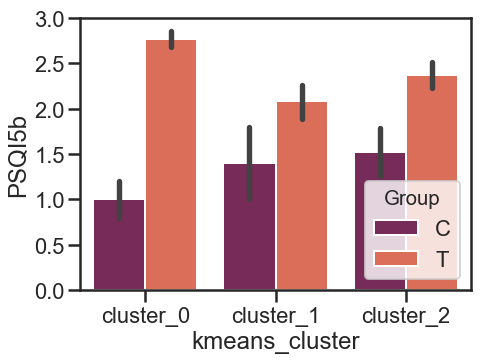

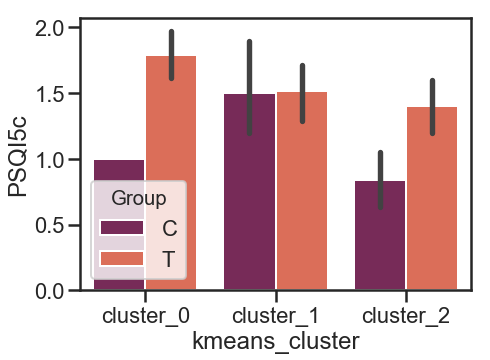

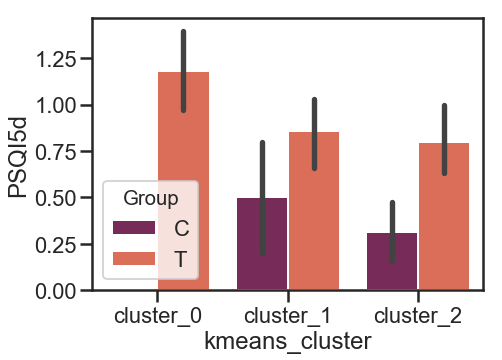

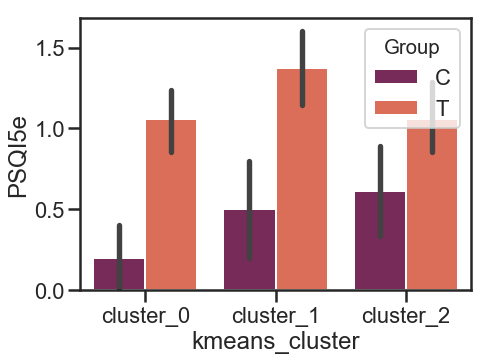

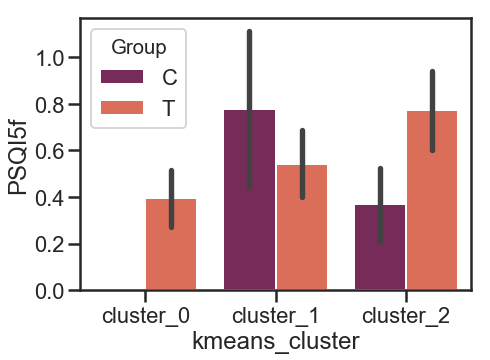

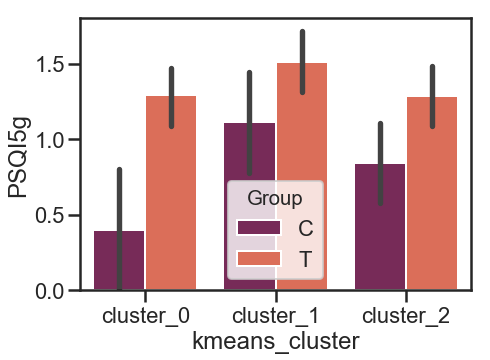

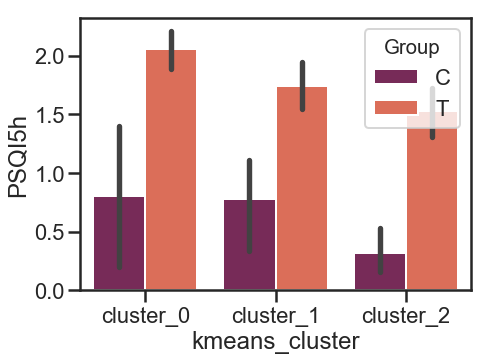

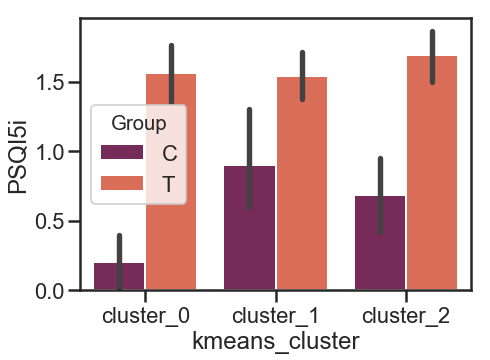

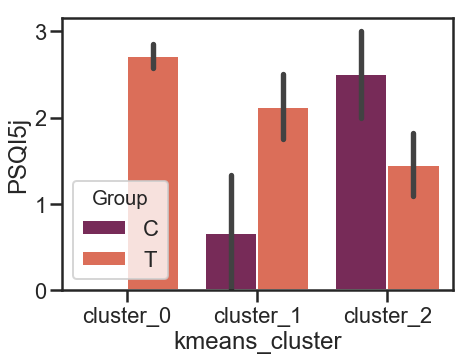

<Figure size 504x360 with 0 Axes>

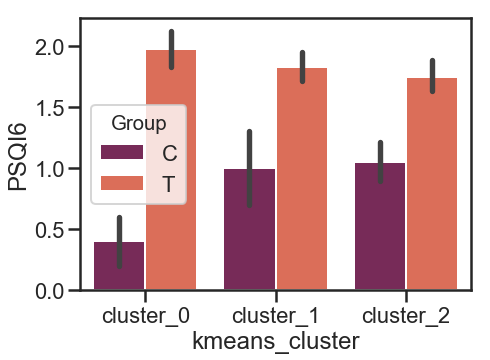

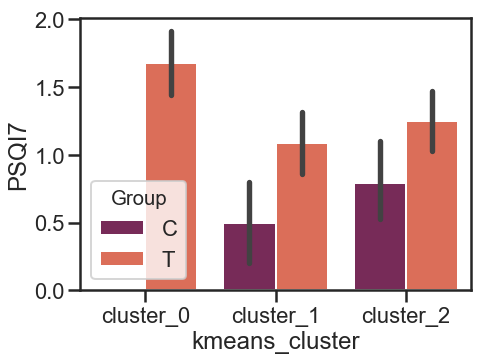

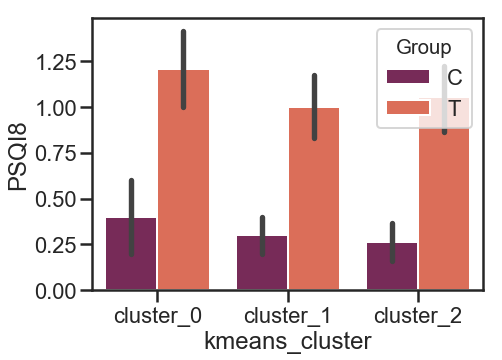

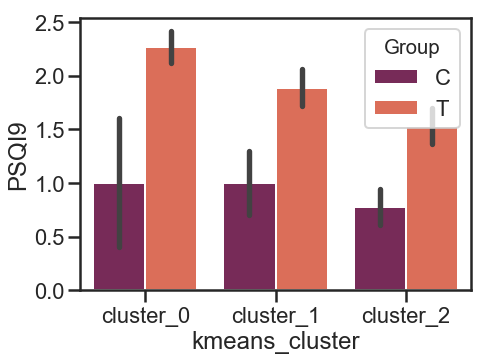

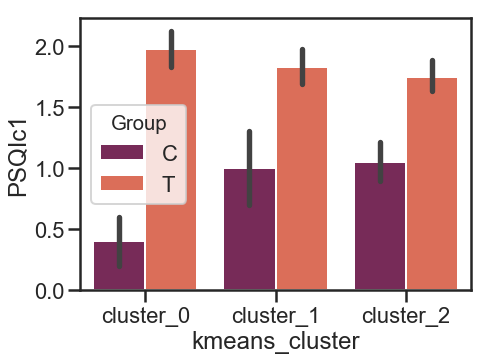

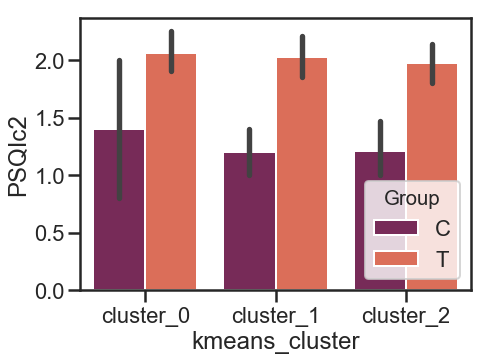

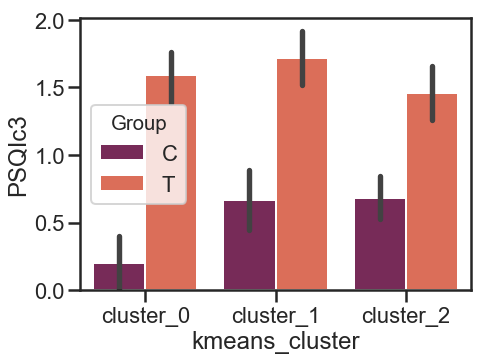

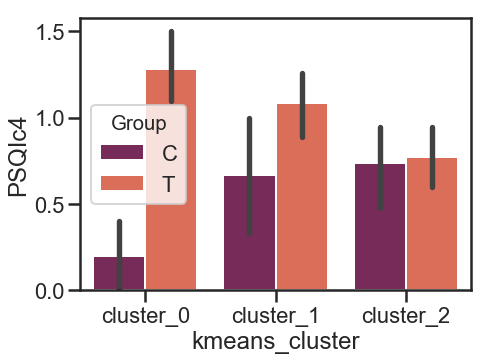

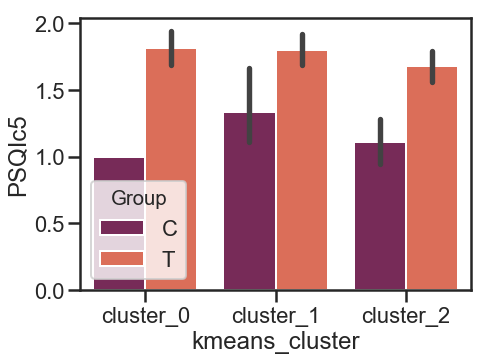

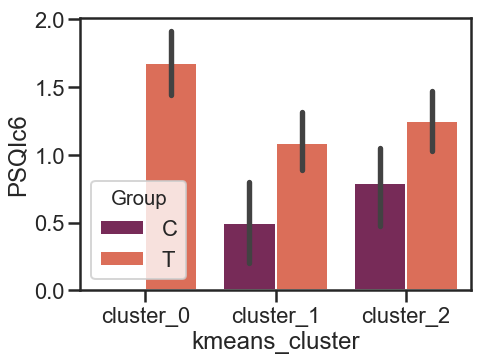

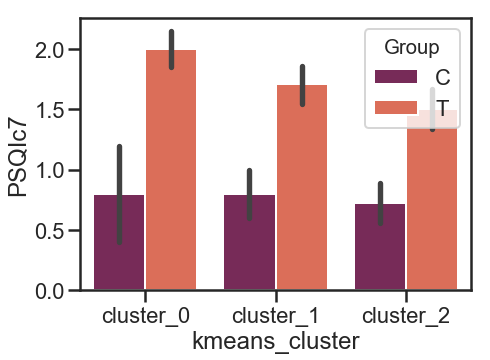

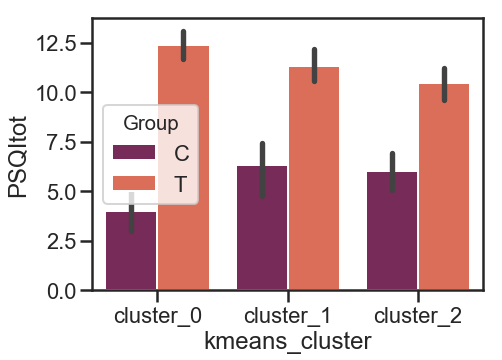

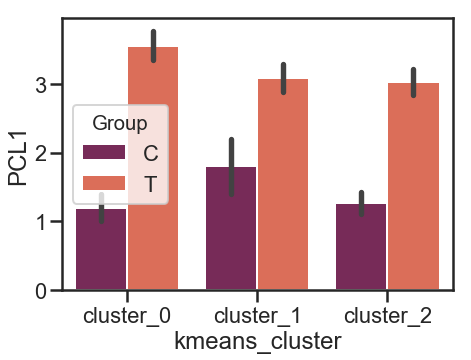

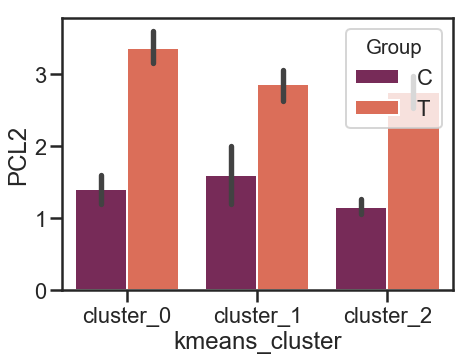

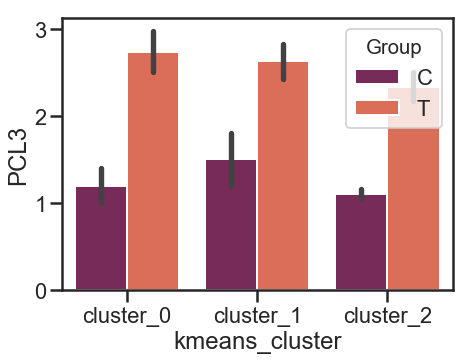

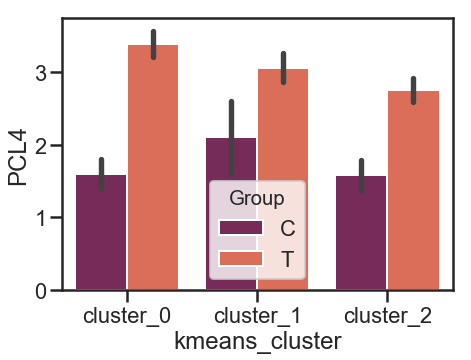

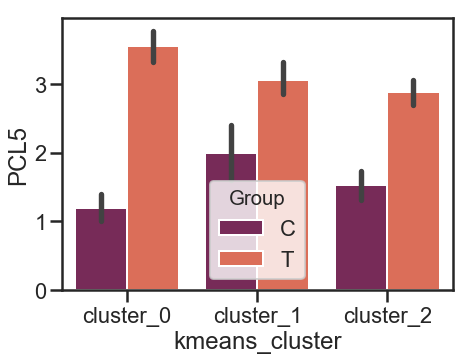

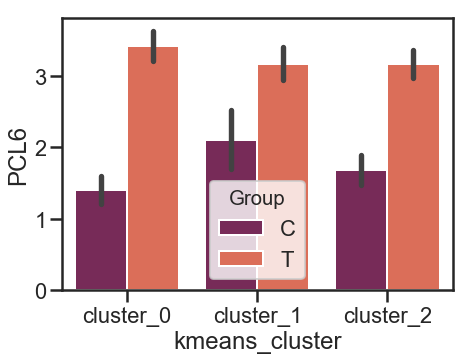

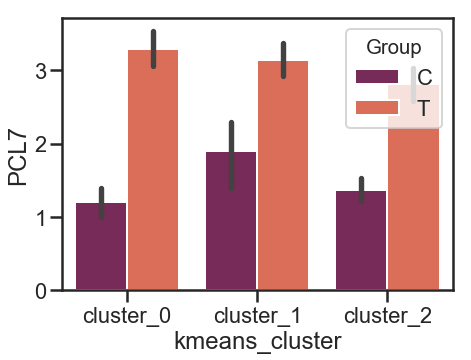

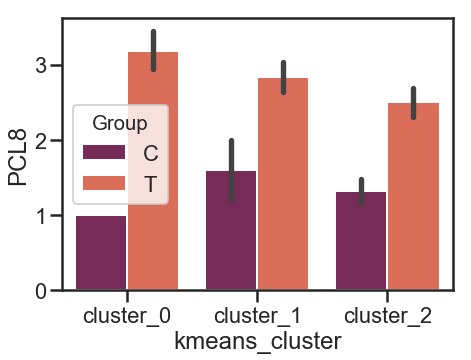

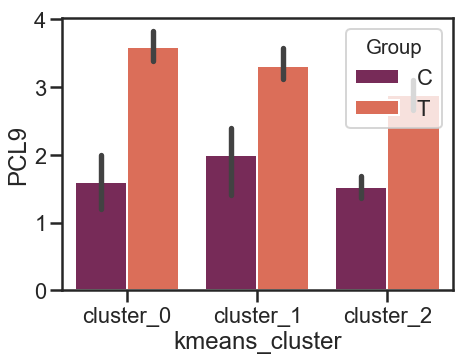

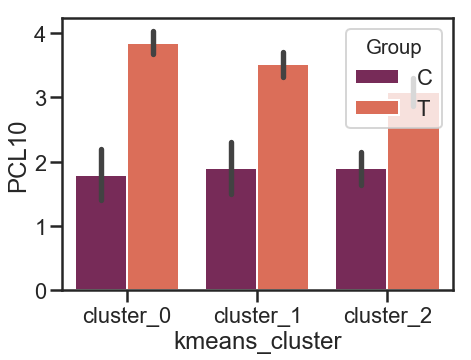

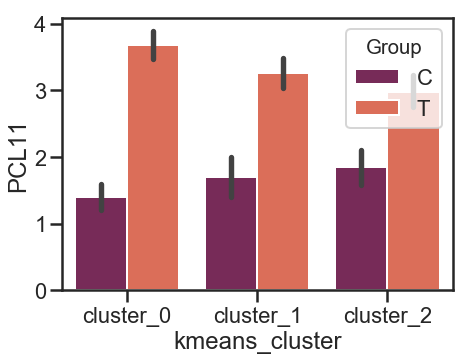

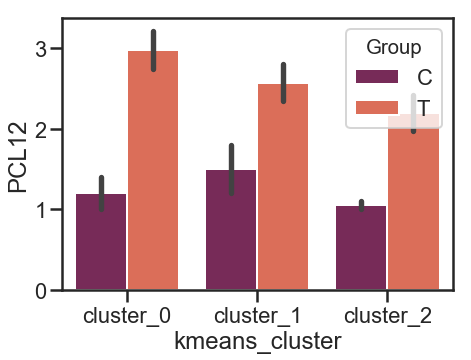

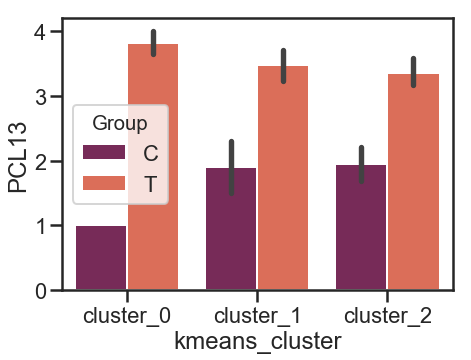

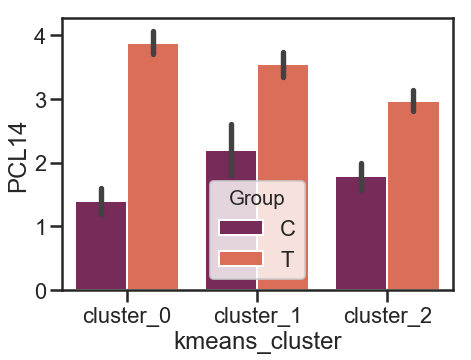

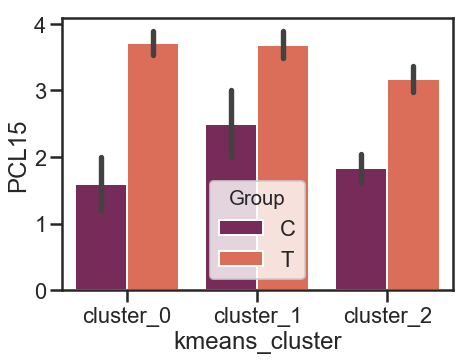

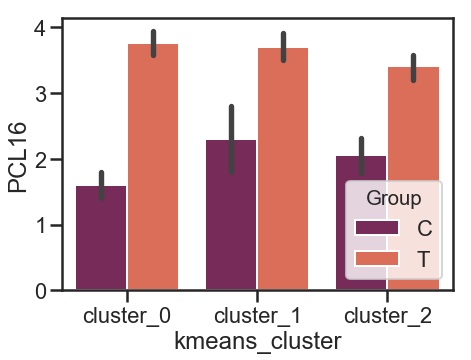

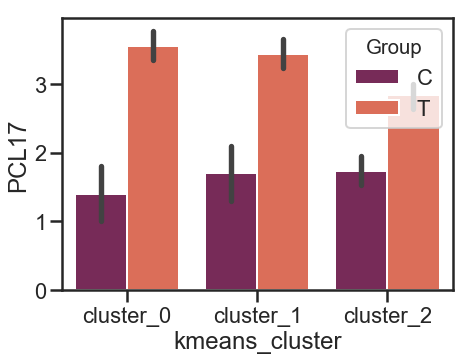

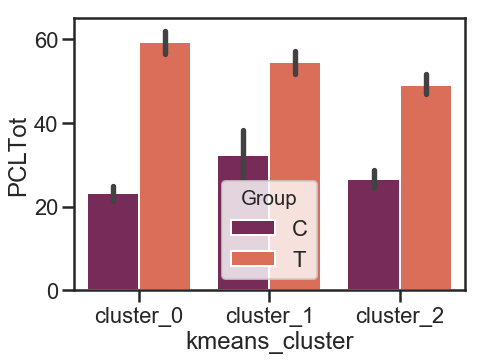

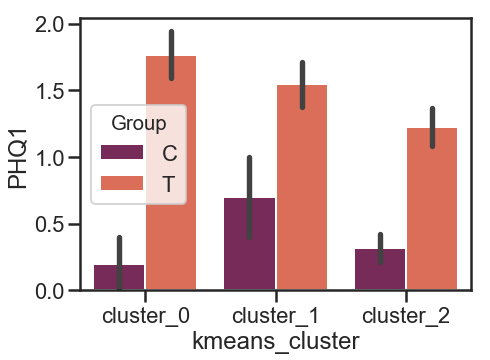

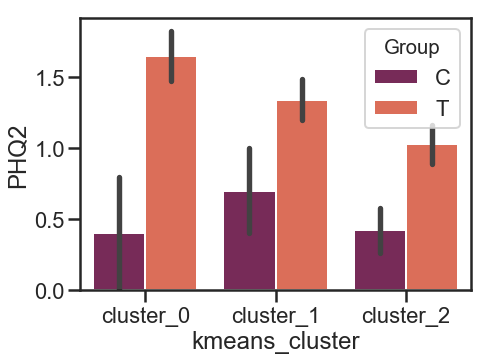

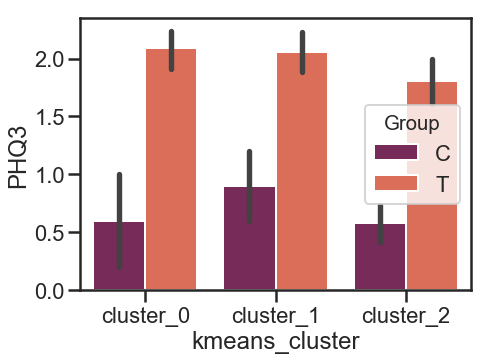

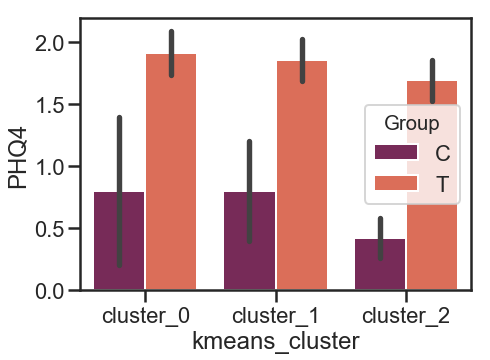

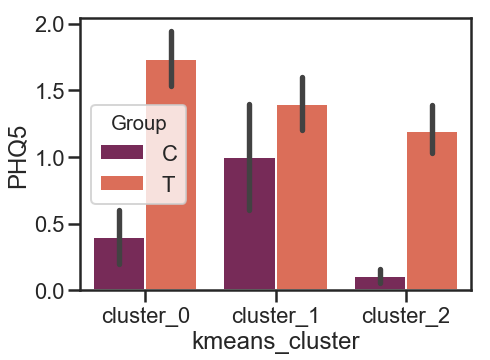

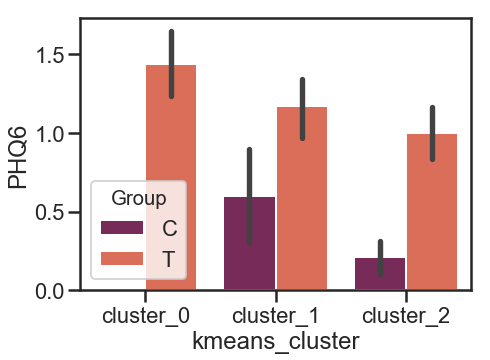

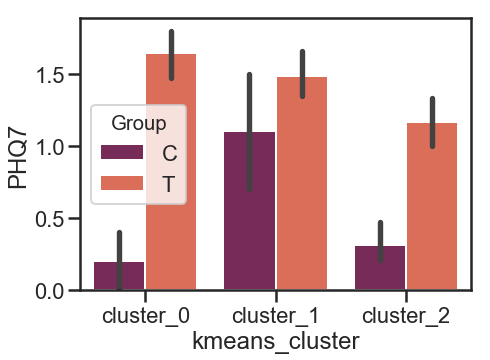

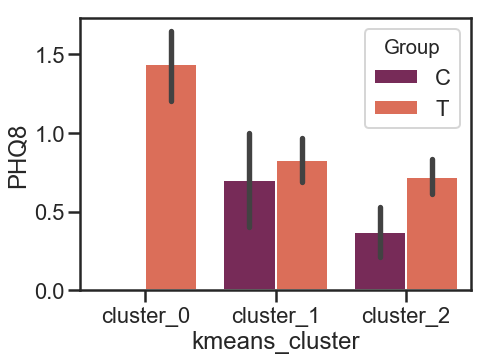

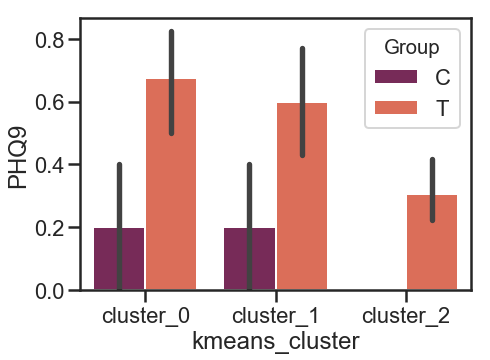

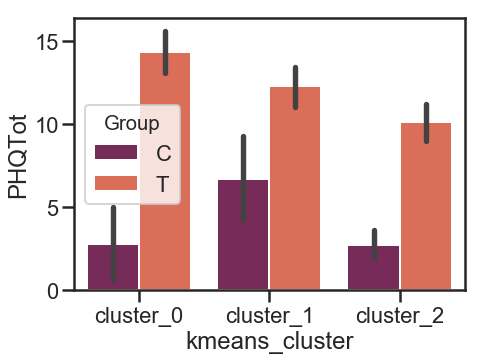

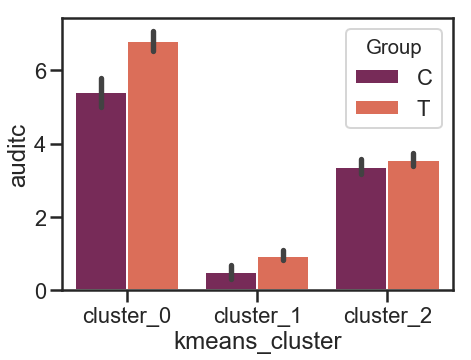

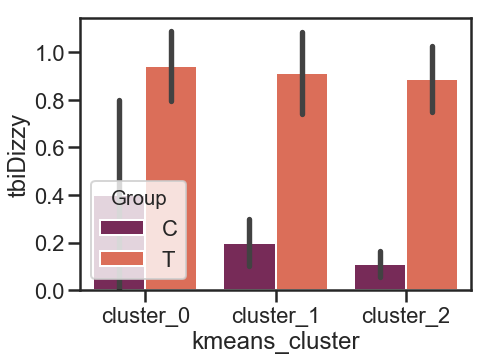

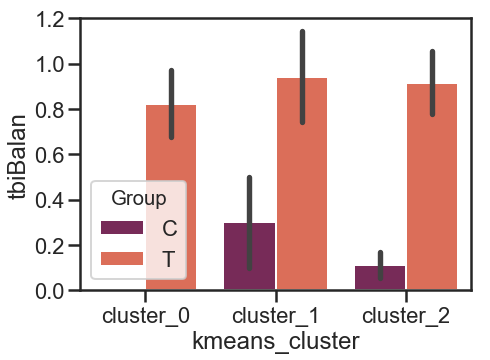

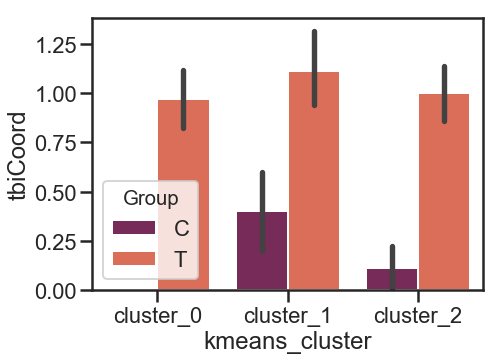

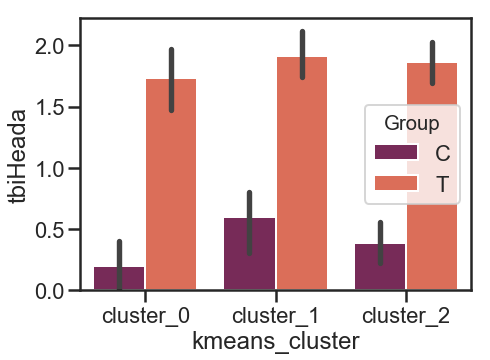

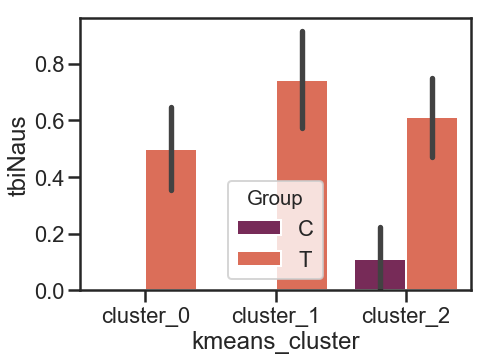

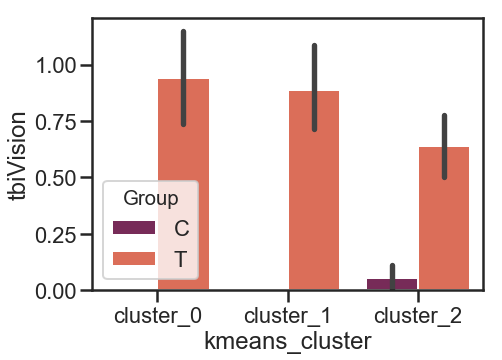

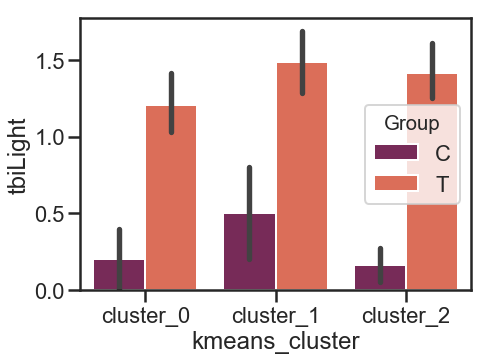

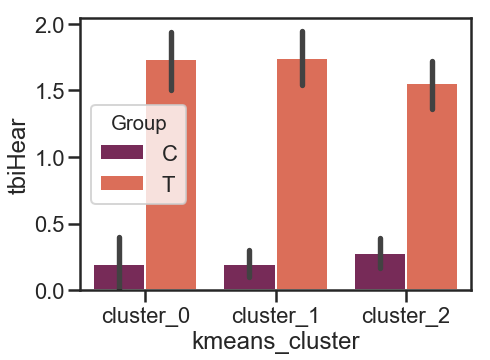

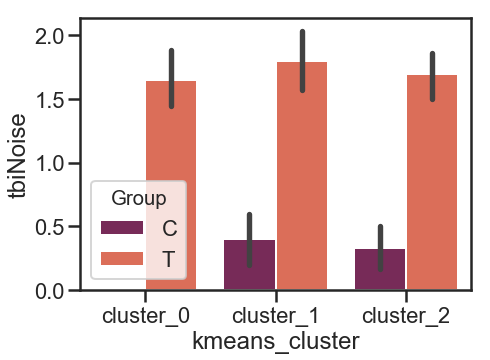

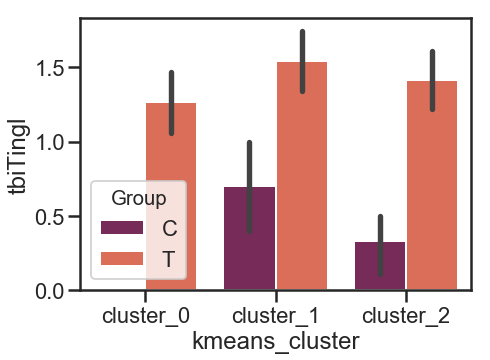

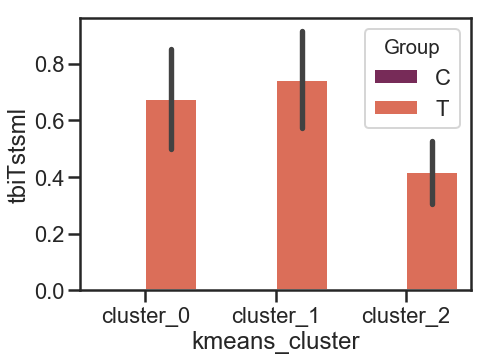

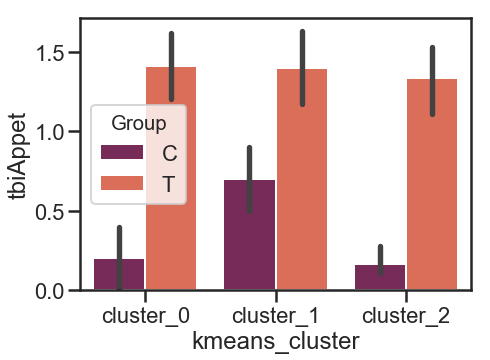

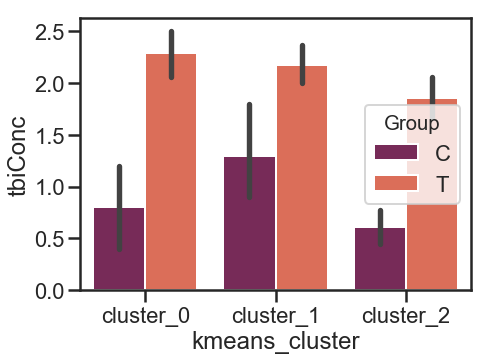

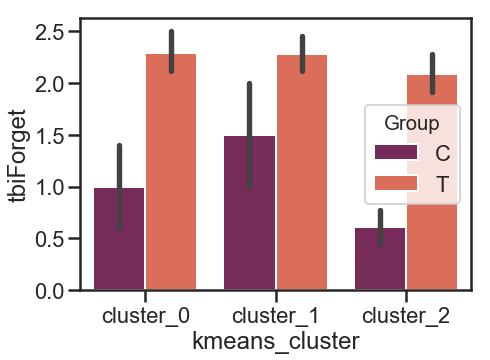

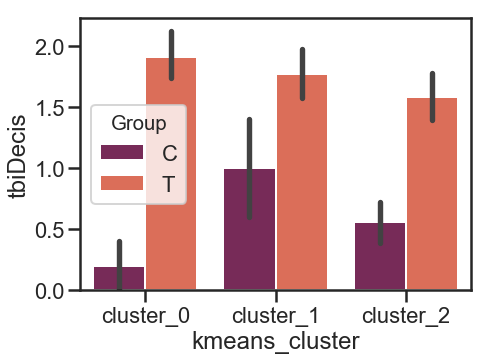

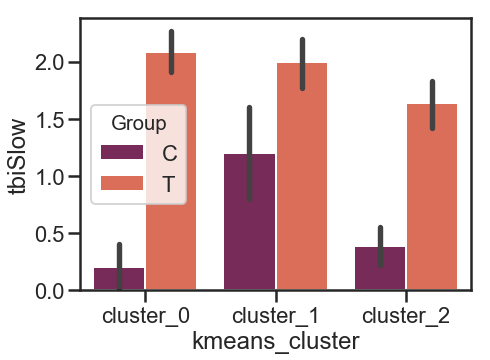

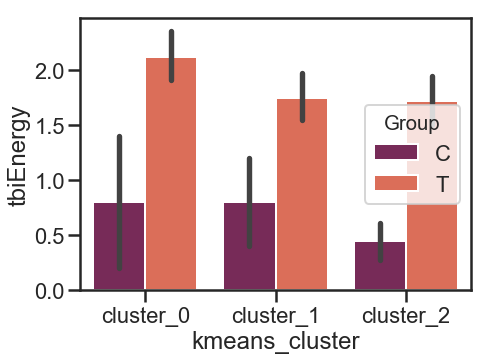

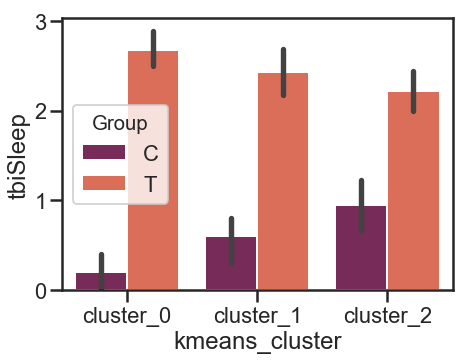

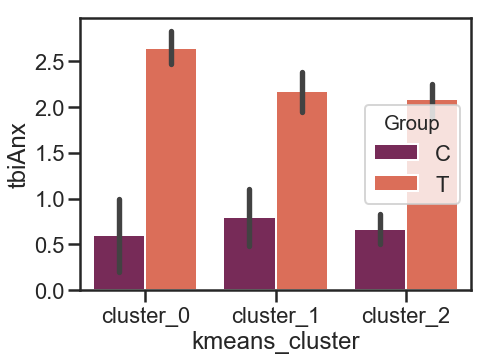

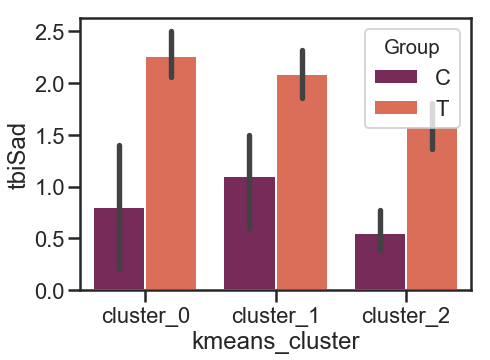

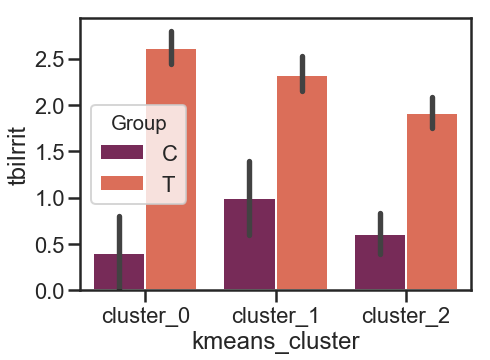

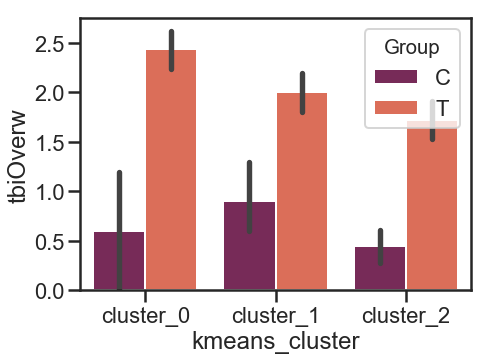

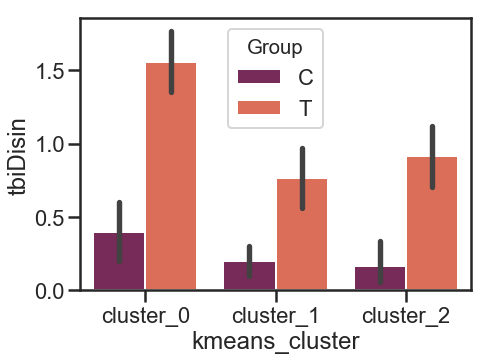

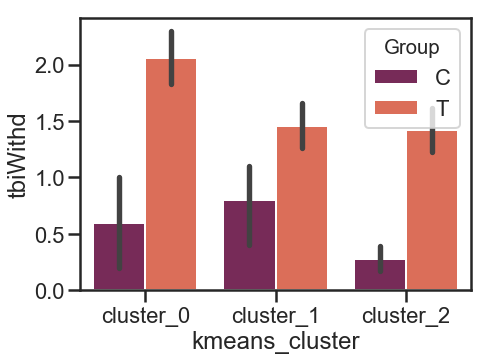

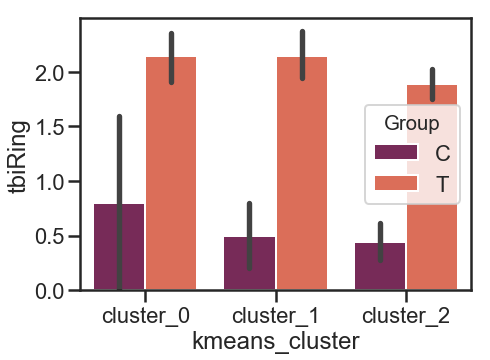

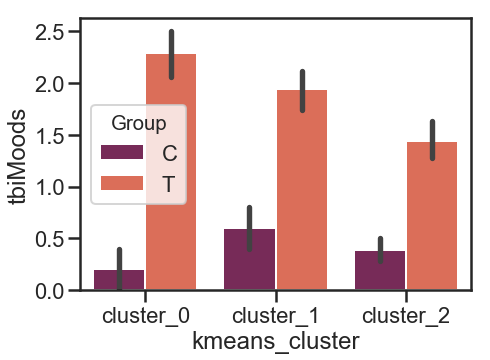

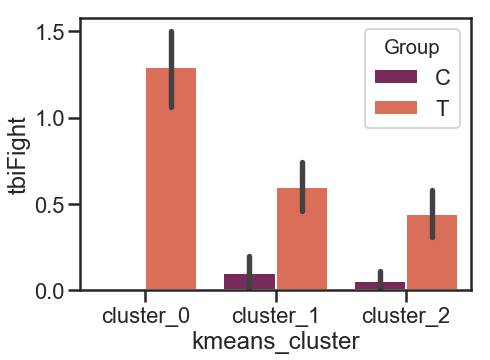

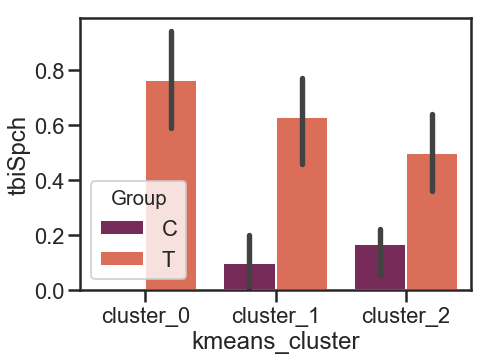

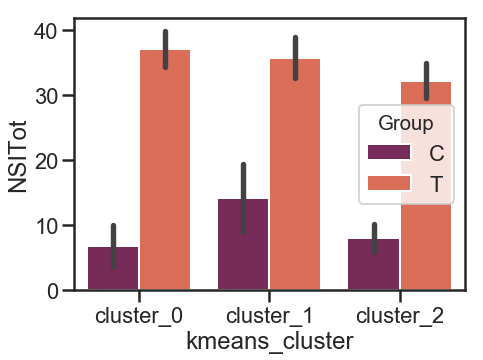

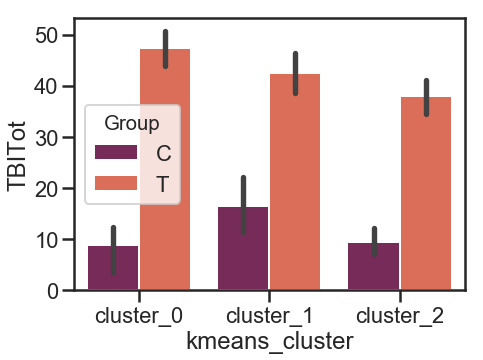

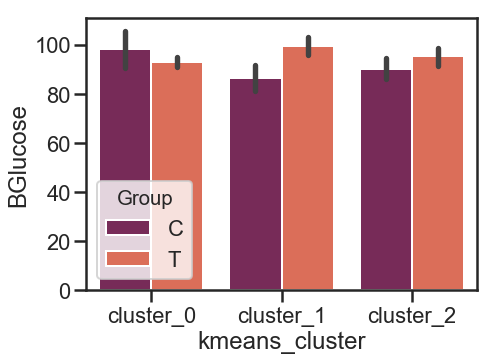

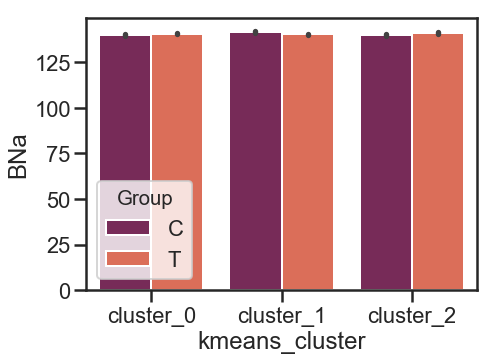

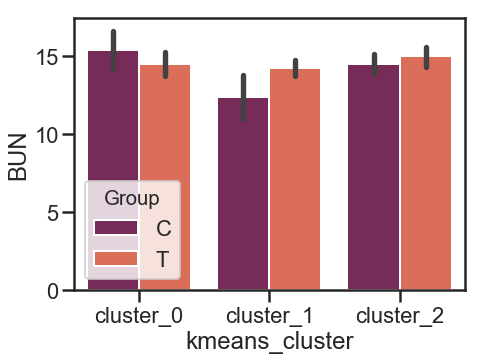

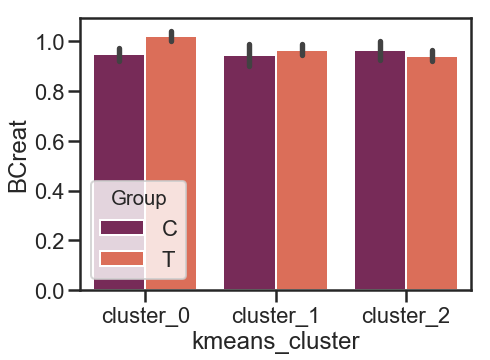

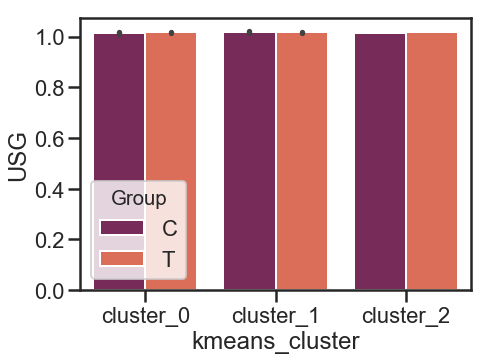

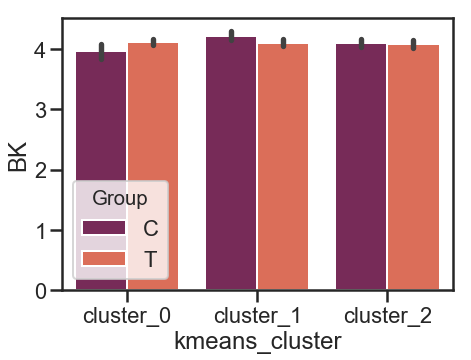

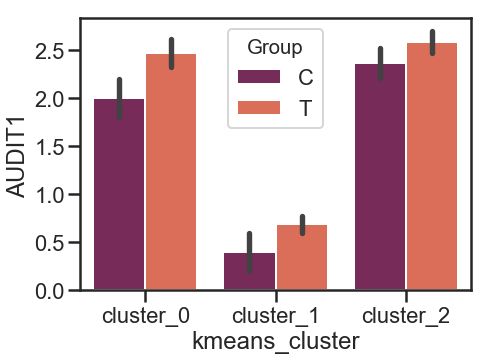

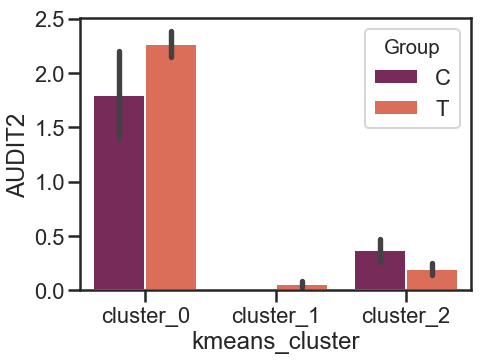

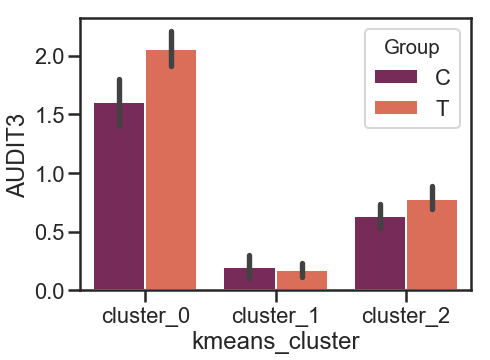

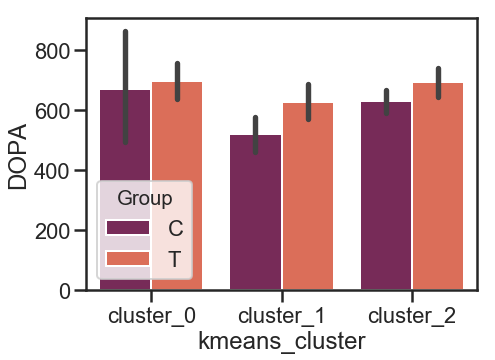

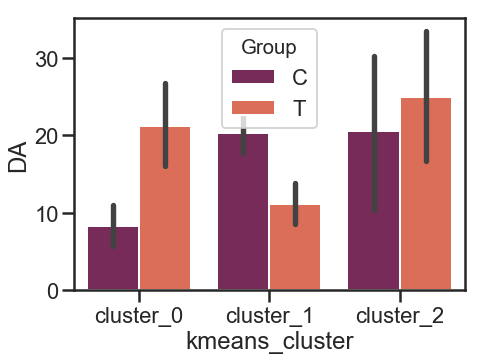

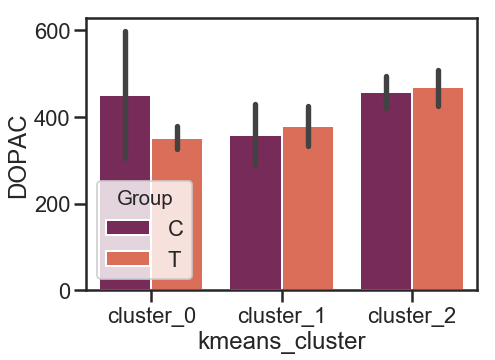

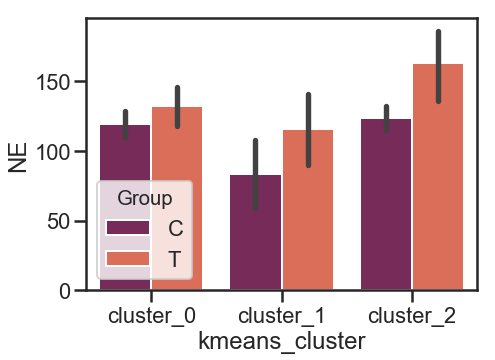

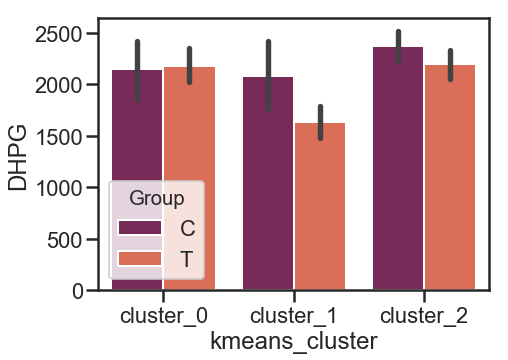

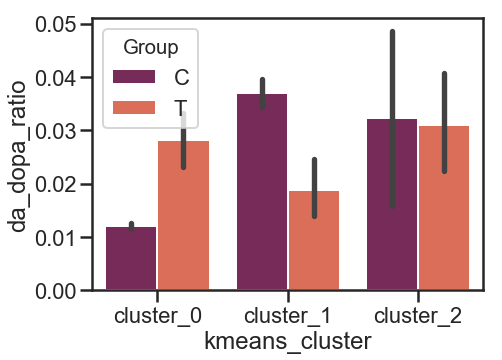

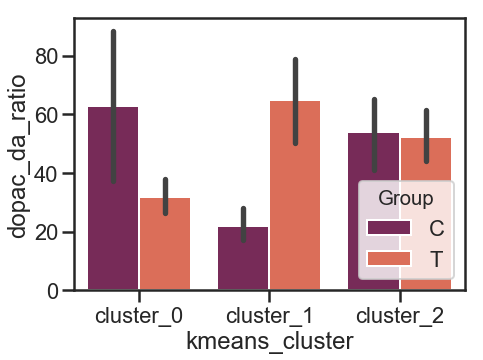

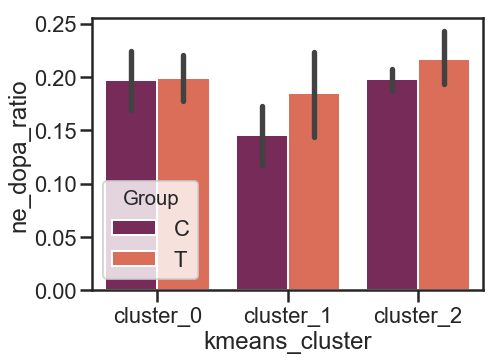

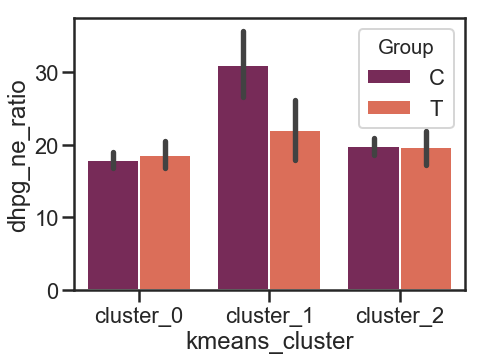

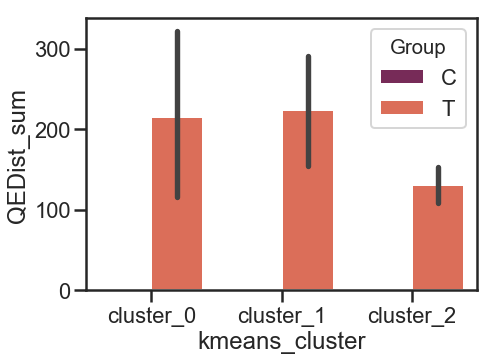

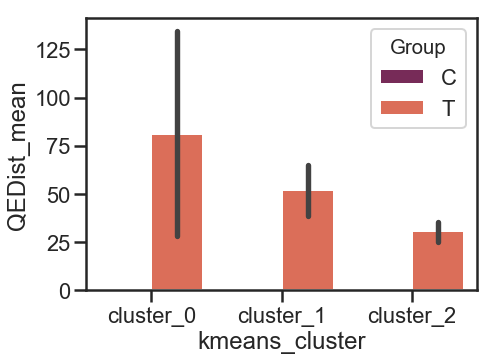

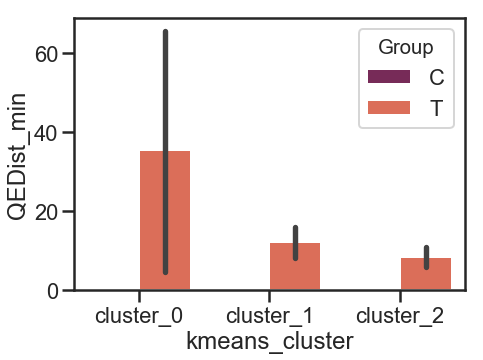

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [32]:

for variable in data_clusters.columns.values:
    try:
        plt.figure(figsize=(7,5))
        sns.barplot(x='kmeans_cluster', y=variable, data=data_clusters, ci=68, hue='Group', palette="rocket", order=["cluster_0", "cluster_1", "cluster_2"])
        #plt.savefig(str(variable + '_plot.png'))
        plt.show()
    except:
        pass

In [ ]:
data.isna().sum()

In [31]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1234)
tsne_features = tsne.fit_transform(data_allgroups_auditqs)

print(tsne_features.shape)
tsne_df = pd.DataFrame(data = tsne_features, columns = ['tsne_0', 'tsne_1'], index = data_allgroups_auditqs.index)
data_TBI_variables = pd.concat([data, tsne_df], axis = 1)

ValueError: could not convert string to float: 'C002'

In [ ]:
sns.scatterplot(x='tsne_0', y='tsne_1', data=data_TBI_variables, hue='kmeans_cluster_AUDITC')

In [ ]:
pca_ss = KernelPCA(n_components=2, kernel='linear', random_state=1)
kernel_pca_linear = pca_ss.fit_transform(data_TBI_variables_scaled)

print(kernel_pca_linear.shape)

kernel_pca_linear_df = pd.DataFrame(data = kernel_pca_linear, columns = ['pca_linear_0', 'pca_linear_1'], index = data_TBI_variables.index)
data_TBI_variables = pd.concat([data_TBI_variables, kernel_pca_linear_df], axis = 1)

In [ ]:
pca_ss = KernelPCA(n_components=2, kernel='rbf', random_state=1)
kernel_pca_rbf = pca_ss.fit_transform(data_TBI_variables_scaled)

print(kernel_pca_rbf.shape)

kernel_pca_rbf_df = pd.DataFrame(data = kernel_pca_rbf, columns = ['pca_rbf_0', 'pca_rbf_1'], index = data_TBI_variables.index)
data_TBI_variables = pd.concat([data_TBI_variables, kernel_pca_rbf_df], axis = 1)

In [ ]:
for variable in variables:
    plt.figure(figsize=(7,7))
    sns.scatterplot(x = 'pca_rbf_0', y = 'pca_rbf_1', data = data_TBI_variables, hue=variable)
    plt.show()
#plt.title("Projection of the data on 2 components + ground truth labels")